# 日本の医療費データ
* https://www.data.go.jp/data/dataset/mhlw_20220307_0033

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates

import japanize_matplotlib

# 都道府県別

In [2]:
df = pd.read_excel('./data/202109-1.xlsx', engine='openpyxl', sheet_name=list(range(34, 51)))

In [96]:
df[34].head(20)

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3           Unnamed: 4  \
0          NaN         NaN         NaN         NaN                  NaN   
1          NaN         NaN         NaN         NaN  【表Ⅲ-1-1】 医療費（都道府県別）   
2          NaN         NaN         NaN         NaN                  NaN   
3          NaN         NaN         NaN         NaN                  NaN   
4          NaN         NaN         NaN         NaN                  NaN   
5          NaN         NaN         NaN         NaN                  NaN   
6          NaN         NaN         NaN         NaN                  NaN   
7          NaN         NaN         NaN         NaN                  NaN   
8          NaN         NaN         NaN         NaN                  NaN   
9          NaN         NaN         NaN         NaN                  NaN   
10         NaN         NaN         NaN         NaN                  NaN   
11         NaN         NaN         NaN         NaN                  NaN   
12         NaN         NaN         NaN         NaN                  NaN   
13         NaN         NaN         NaN         NaN                  NaN   
14         NaN         NaN         NaN         NaN                  NaN   
15         NaN         NaN         NaN         NaN                  NaN   
16         NaN         NaN         NaN         NaN                  NaN   
17         NaN         NaN         NaN         NaN                  NaN   
18         NaN         NaN         NaN         NaN                  NaN   
19         NaN         NaN         NaN         NaN                  NaN   

   Unnamed: 5 Unnamed: 6 Unnamed: 7  Unnamed: 8  Unnamed: 9  ... Unnamed: 109  \
0         NaN        NaN        NaN         NaN         NaN  ...          NaN   
1         NaN        NaN        NaN         NaN         NaN  ...          NaN   
2         NaN        NaN        NaN         NaN         NaN  ...          NaN   
3         NaN        NaN        NaN         NaN         NaN  ...          NaN   
4         NaN        NaN        NaN         NaN         NaN  ...          NaN   
5         NaN        NaN        NaN         NaN         NaN  ...          10月   
6       電算処理分         総数        NaN         NaN         NaN  ...            0   
7         NaN        NaN        北海道         NaN         NaN  ...            0   
8         NaN        NaN        青　森         NaN         NaN  ...            0   
9         NaN        NaN        岩　手         NaN         NaN  ...            0   
10        NaN        NaN        宮　城         NaN         NaN  ...            0   
11        NaN        NaN        秋　田         NaN         NaN  ...            0   
12        NaN        NaN        山　形         NaN         NaN  ...            0   
13        NaN        NaN        福　島         NaN         NaN  ...            0   
14        NaN        NaN        茨　城         NaN         NaN  ...            0   
15        NaN        NaN        栃　木         NaN         NaN  ...            0   
16        NaN        NaN        群　馬         NaN         NaN  ...            0   
17        NaN        NaN        埼　玉         NaN         NaN  ...            0   
18        NaN        NaN        千　葉         NaN         NaN  ...            0   
19        NaN        NaN        東　京         NaN         NaN  ...            0   

   Unnamed: 110 Unnamed: 111 Unnamed: 112 Unnamed: 113 Unnamed: 114  \
0           NaN          NaN          NaN          NaN          NaN   
1           NaN          NaN          NaN          NaN          NaN   
2           NaN          NaN          NaN          NaN          NaN   
3           NaN          NaN          NaN          NaN          NaN   
4           NaN          NaN          NaN          NaN          NaN   
5           11月          12月           1月           2月           3月   
6             0            0            0            0            0   
7             0            0            0            0            0   
8             0            0            0            0            0   
9             0 

In [3]:
def preprocessing_prefecture(df):
    
    prepocessed_data = dict()
    index = df[35].iloc[7:56, 7].dropna()
    # print(index)
    columns = [f'{i}月' for i in range(4, 13)] + [f'{i}月' for i in range(1, 4)]
    nengo = list(range(2015, 2022))
    
    # データの順番に沿ったカラム
    all_columns = []
    for c in columns:
        if int(c[:-1]) > 3:
            all_columns += [pd.to_datetime(f'{n}/{c[:-1]}').strftime('%Y/%m') for n in nengo]
        else:
             all_columns += [pd.to_datetime(f'{n+1}/{c[:-1]}').strftime('%Y/%m') for n in nengo]
    
    # 並び替えた後のカラム
    sorted_columns = sorted(all_columns)
    # print(all_columns)
    
    for k, d in df.items():
        
        # df title
        title = d.iloc[1, 4]
        tdf = d.set_index('Unnamed: 7')
        tdf.columns = tdf.iloc[5]
        # print(tdf.columns, tdf.index)
        tdf = tdf.iloc[:56, ].loc[index, columns]
        tdf = tdf.replace('・', np.nan).astype(float)
        
        # set columns nengo
        tdf.columns = all_columns
        tdf.index.name = '都道府県'
        # 文字の間の空白を削除
        tdf.index = tdf.index.str.replace('\u3000', '')
        prepocessed_data[title] = tdf[sorted_columns].T # 日付をindex, 内容をcolumnsに変更
        # prepocessed_data[title].columns = pd.to_datetime(prepocessed_data[title].columns, )
        # prepocessed_data[title] = prepocessed_data[title].columns = []

    return prepocessed_data

In [4]:
pdf = preprocessing_prefecture(df)

In [6]:
pdf['【表Ⅲ-1-5】 １件当たり日数（都道府県別）'].to_csv('./data/【表Ⅲ-1-5】 １件当たり日数（都道府県別）.csv')

* 可視化すると楽しそうなやつ
```python
'【表Ⅲ-1-5】 １件当たり日数（都道府県別）'
'【表Ⅲ-2-4】 入院  １日当たり医療費（都道府県別）'
'【表Ⅲ-2-7】 入院  推計平均在院日数（都道府県別）'
'【表Ⅲ-3-4】 入院外  １日当たり医療費（都道府県別）'
'【表Ⅲ-3-5】 入院外  １件当たり日数（都道府県別）'
```

In [501]:
pdf.keys()

dict_keys(['【表Ⅲ-1-1】 医療費（都道府県別）', '【表Ⅲ-1-2】 受診延日数（都道府県別）', '【表Ⅲ-1-3】 件数（都道府県別）', '【表Ⅲ-1-4】 １日当たり医療費（都道府県別）', '【表Ⅲ-1-5】 １件当たり日数（都道府県別）', '【表Ⅲ-2-1】 入院  医療費（都道府県別）', '【表Ⅲ-2-2】 入院  受診延日数（都道府県別）', '【表Ⅲ-2-3】 入院  件数（都道府県別）', '【表Ⅲ-2-4】 入院  １日当たり医療費（都道府県別）', '【表Ⅲ-2-5】 入院  １件当たり日数（都道府県別）', '【表Ⅲ-2-6】 入院  推計新規入院件数（都道府県別）', '【表Ⅲ-2-7】 入院  推計平均在院日数（都道府県別）', '【表Ⅲ-3-1】 入院外  医療費（都道府県別）', '【表Ⅲ-3-2】 入院外  受診延日数（都道府県別）', '【表Ⅲ-3-3】 入院外  件数（都道府県別）', '【表Ⅲ-3-4】 入院外  １日当たり医療費（都道府県別）', '【表Ⅲ-3-5】 入院外  １件当たり日数（都道府県別）'])

In [8]:
viz_columns = ['【表Ⅲ-1-5】 １件当たり日数（都道府県別）',
'【表Ⅲ-2-4】 入院  １日当たり医療費（都道府県別）',
'【表Ⅲ-2-7】 入院  推計平均在院日数（都道府県別）',
'【表Ⅲ-3-4】 入院外  １日当たり医療費（都道府県別）',
'【表Ⅲ-3-5】 入院外  １件当たり日数（都道府県別）']

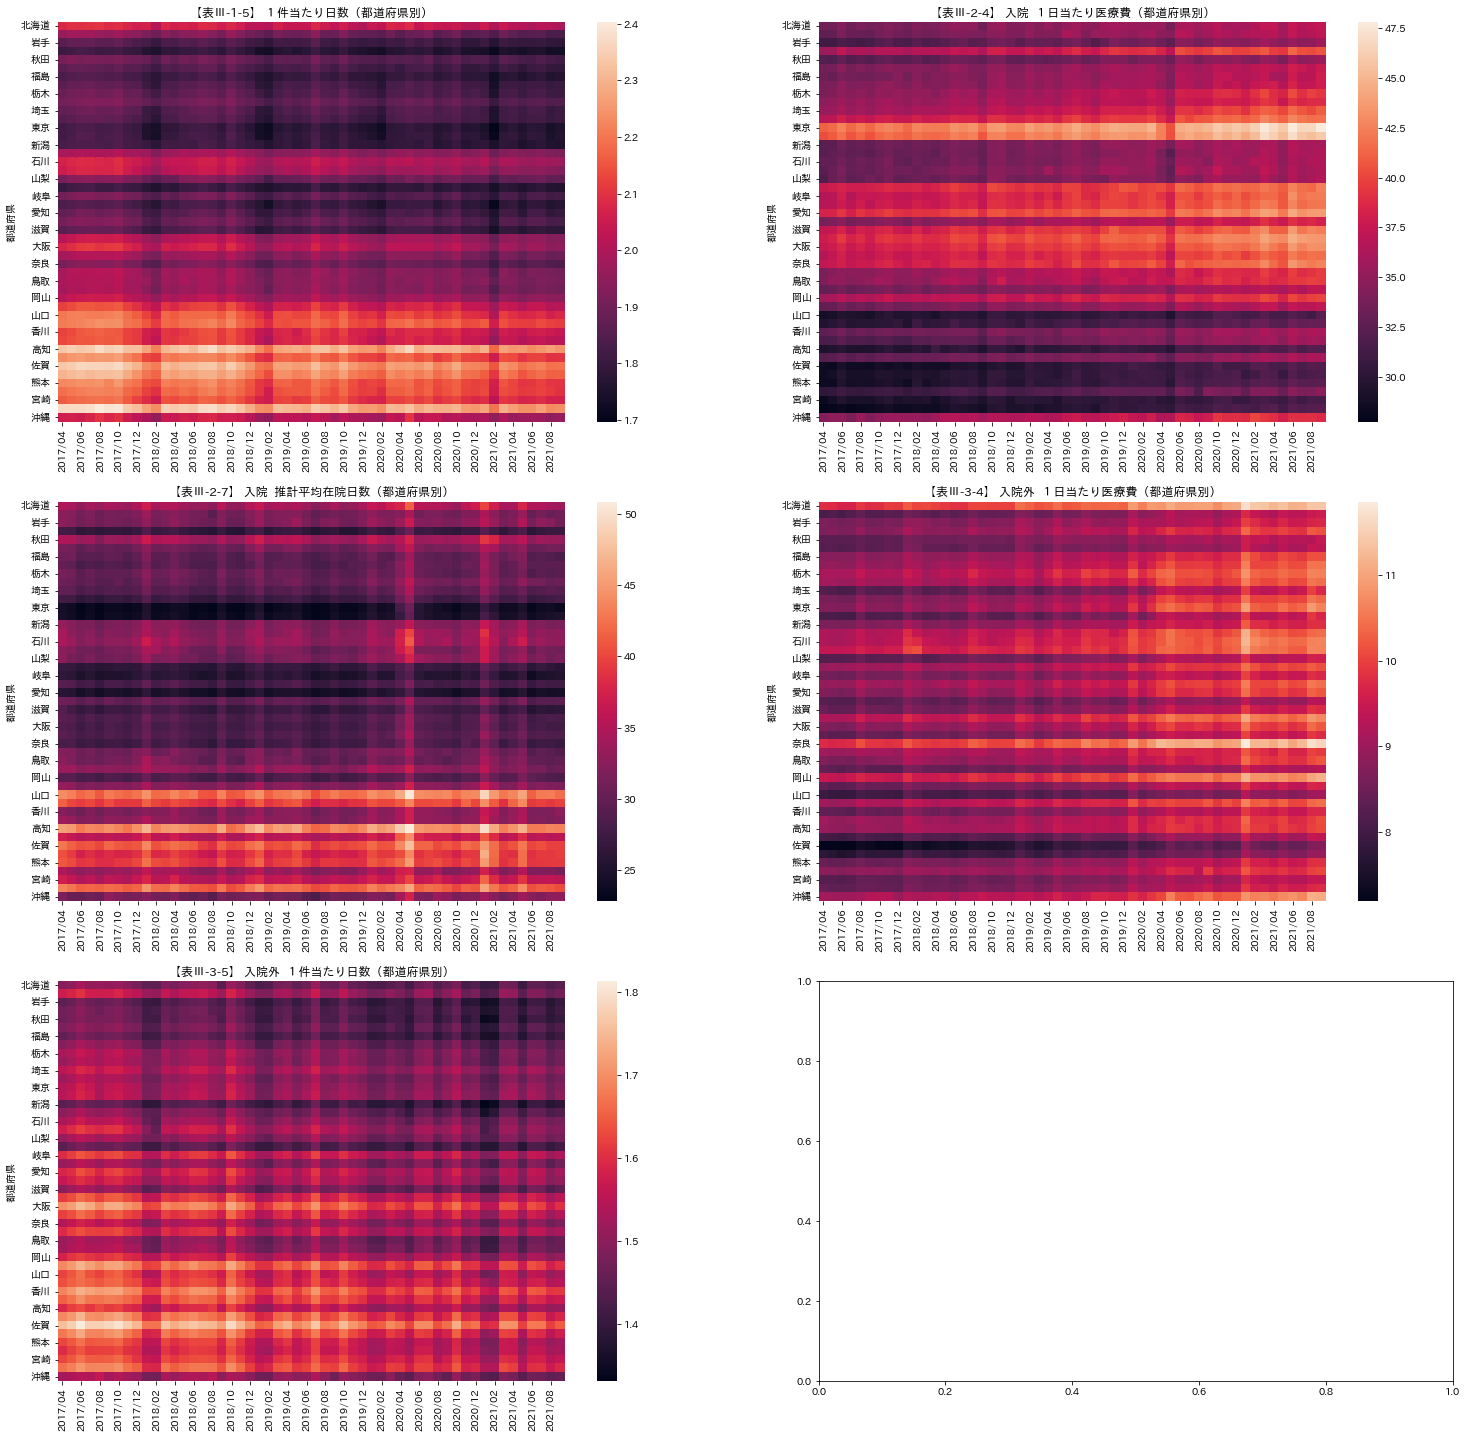

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 25))
for i, c in enumerate(viz_columns):
    ax = axes[i // 2, i % 2]
    sns.heatmap(pdf[c].T.loc[:, pdf[c].sum(axis=1) > 0], ax = ax)
    ax.set_title(c)
plt.show()

## 平均を日本地図にプロット
* https://qiita.com/SaitoTsutomu/items/6d17889ba47357e44131
* https://www.jcsc.co.jp/tech_blog/archives/50
* https://www.so-wi.com/2021/02/11/japan_map_data_apply.html

In [10]:
from japanmap import picture

In [19]:
picture?

Signature: picture(dic=None, rate=1)
Docstring: ラスターデータ
File:      ~/.local/lib/python3.6/site-packages/japanmap/__init__.py
Type:      function


In [11]:
def show_japan_map(df, title, figsize=(8,8)):
    # 入力 df -> index: 都道府県, column: 全ての期間の平均値
    
    plt.figure(figsize=figsize)
    cmap = plt.get_cmap('Reds')
    # 完全失業率の最大と最小値でノーマライズし、変数normで受ける
    norm = plt.Normalize(vmin=df.min(), vmax=df.max())
    # データを#ffffe5から#662505のHexCodeにする関数
    unemp_col = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()
    # カラー尺度をつける
    plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
    # 各都道府県に対してunemp_colを適用してpictureに入力
    plt.imshow(picture(df.apply(unemp_col)))
    plt.title(title)


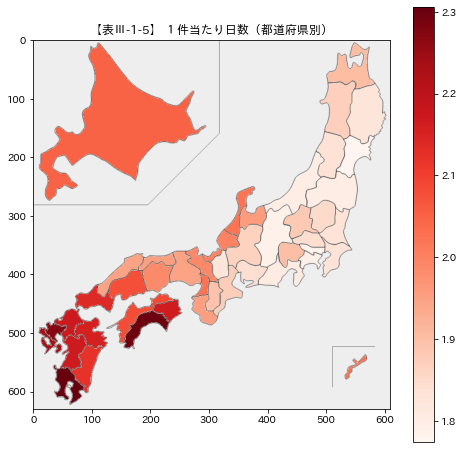

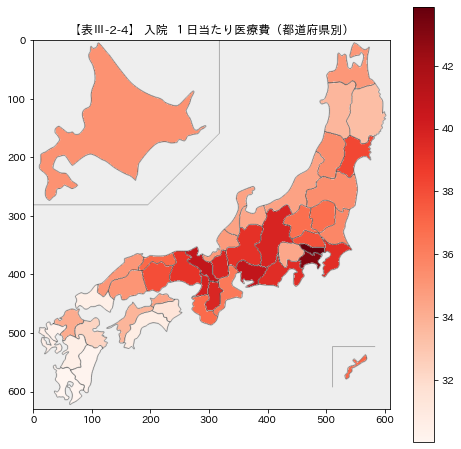

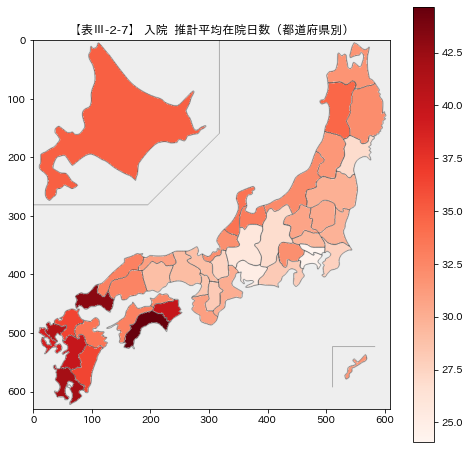

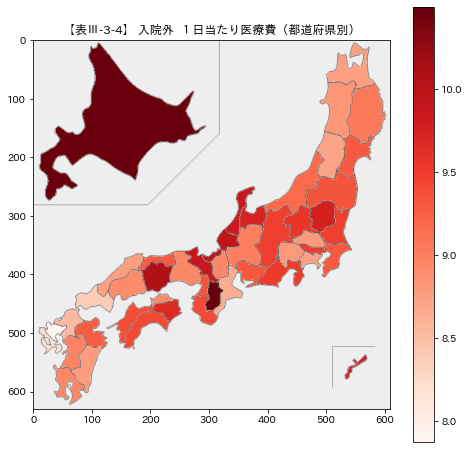

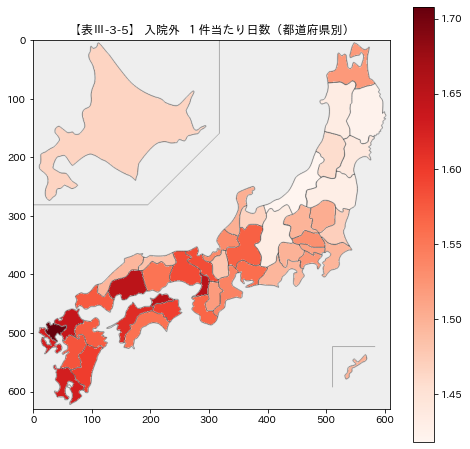

In [12]:
for c in viz_columns:
    show_japan_map(pdf[c].mean(axis=0), c)

# 傷病別

In [20]:
df1 = pd.read_excel('./data/202109-1.xlsx', engine='openpyxl', sheet_name=list(range(68, 85)))

In [277]:
df1[68].head(10)

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3           Unnamed: 4  \
0         NaN         NaN         NaN         NaN                  NaN   
1         NaN         NaN         NaN         NaN  【表Ⅴ-1-1】 医療費（傷病分類別）   
2         NaN         NaN         NaN         NaN                  NaN   
3         NaN         NaN         NaN         NaN                  NaN   
4         NaN         NaN         NaN         NaN                  NaN   
5         NaN         NaN         NaN         NaN                  NaN   
6         NaN         NaN         NaN         NaN                  NaN   
7         NaN         NaN         NaN         NaN                  NaN   
8         NaN         NaN         NaN         NaN                  NaN   
9         NaN         NaN         NaN         NaN                  NaN   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  Unnamed: 9  ... Unnamed: 109  \
0        NaN        NaN        NaN        NaN         NaN  ...          NaN   
1        NaN        NaN        NaN        NaN         NaN  ...          NaN   
2        NaN        NaN        NaN        NaN         NaN  ...          NaN   
3        NaN        NaN        NaN        NaN         NaN  ...          NaN   
4        NaN        NaN        NaN        NaN         NaN  ...          NaN   
5        NaN        NaN        NaN        NaN         NaN  ...          10月   
6      電算処理分         総数        NaN        NaN         NaN  ...            0   
7        NaN        NaN  感染症及び寄生虫症        NaN         NaN  ...            0   
8        NaN        NaN        NaN      腸管感染症         NaN  ...            0   
9        NaN        NaN        NaN         結核         NaN  ...            0   

  Unnamed: 110 Unnamed: 111 Unnamed: 112 Unnamed: 113 Unnamed: 114  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   
5          11月          12月           1月           2月           3月   
6            0            0            0            0            0   
7            0            0            0            0            0   
8            0            0            0            0            0   
9            0            0            0            0            0   

  Unnamed: 115 Unnamed: 116 Unnamed: 117           Unnamed: 118  
0          NaN          NaN          NaN                    NaN  
1          NaN          NaN          NaN                    NaN  
2          NaN      （単位：億円）          NaN                    NaN  
3          NaN          NaN          NaN  構成割合\n令和3年度\n4月～9月(%)  
4          NaN          NaN          NaN                    NaN  
5          NaN          NaN          NaN                    NaN  
6          NaN          NaN          NaN                    100  
7          NaN          NaN          NaN                1.88945  
8          NaN          NaN          NaN               0.300106  
9          NaN          NaN          NaN              0.0597141  

[10 rows x 119 columns]

In [21]:
def preprocessing_injured(df, summary=False):
    
    if summary:
        index_col = 'Unnamed: 7'
        index_num = 7
    else:
        index_col = 'Unnamed: 8'
        index_num = 8
    
    prepocessed_data = dict()
    index = df[68].iloc[7:150, index_num].dropna()
    # print(index)
    columns = [f'{i}月' for i in range(4, 13)] + [f'{i}月' for i in range(1, 4)]
    nengo = list(range(2015, 2022))
    
    # データの順番に沿ったカラム
    all_columns = []
    for c in columns:
        if int(c[:-1]) > 3:
            all_columns += [pd.to_datetime(f'{n}/{c[:-1]}').strftime('%Y/%m') for n in nengo]
        else:
             all_columns += [pd.to_datetime(f'{n+1}/{c[:-1]}').strftime('%Y/%m') for n in nengo]
    
    # 並び替えた後のカラム
    sorted_columns = sorted(all_columns)
    # print(all_columns)
    
    for k, d in df.items():
        
        # df title
        title = d.iloc[1, 4]
        tdf = d.set_index(index_col)
        tdf.columns = tdf.iloc[5]
        # print(tdf.columns, tdf.index)
        tdf = tdf.iloc[:150, ].loc[index, columns]
        tdf = tdf.replace('・', np.nan).astype(float)
        
        # set columns nengo
        tdf.columns = all_columns
        tdf.index.name = '疾患名'
        # 文字の間の空白を削除
        prepocessed_data[title] = tdf[sorted_columns].T

    return prepocessed_data

In [22]:
pdf1 = preprocessing_injured(df1)

In [23]:
pdf1.keys()

dict_keys(['【表Ⅴ-1-1】 医療費（傷病分類別）', '【表Ⅴ-1-2】 受診延日数（傷病分類別）', '【表Ⅴ-1-3】 件数（傷病分類別）', '【表Ⅴ-1-4】 １日当たり医療費（傷病分類別）', '【表Ⅴ-1-5】 １件当たり日数（傷病分類別）', '【表Ⅴ-2-1】 入院 医療費（傷病分類別）', '【表Ⅴ-2-2】 入院 受診延日数（傷病分類別）', '【表Ⅴ-2-3】 入院 件数（傷病分類別）', '【表Ⅴ-2-4】 入院 １日当たり医療費（傷病分類別）', '【表Ⅴ-2-5】 入院 １件当たり日数（傷病分類別）', '【表Ⅴ-2-6】 入院 推計新規入院件数（傷病分類別）', '【表Ⅴ-2-7】 入院 推計平均在院日数（傷病分類別）', '【表Ⅴ-3-1】 入院外 医療費（傷病分類別）', '【表Ⅴ-3-2】 入院外 受診延日数（傷病分類別）', '【表Ⅴ-3-3】 入院外 件数（傷病分類別）', '【表Ⅴ-3-4】 入院外 １日当たり医療費（傷病分類別）', '【表Ⅴ-3-5】 入院外 １件当たり日数（傷病分類別）'])

In [24]:
pdf1['【表Ⅴ-1-1】 医療費（傷病分類別）']

疾患名      腸管感染症   結核  主として性的伝播様式をとる感染症  皮膚及び粘膜の病変を伴うウイルス性疾患  ウイルス性肝炎  \
2015/04    0.0  0.0               0.0                  0.0      0.0   
2015/05    0.0  0.0               0.0                  0.0      0.0   
2015/06    0.0  0.0               0.0                  0.0      0.0   
2015/07    0.0  0.0               0.0                  0.0      0.0   
2015/08    0.0  0.0               0.0                  0.0      0.0   
...        ...  ...               ...                  ...      ...   
2021/11    0.0  0.0               0.0                  0.0      0.0   
2021/12    0.0  0.0               0.0                  0.0      0.0   
2022/01    0.0  0.0               0.0                  0.0      0.0   
2022/02    0.0  0.0               0.0                  0.0      0.0   
2022/03    0.0  0.0               0.0                  0.0      0.0   

疾患名      その他のウイルス性疾患  真菌症  感染症及び寄生虫症の続発・後遺症  その他の感染症及び寄生虫症  胃の悪性新生物  ...  \
2015/04          0.0  0.0               0.0            0.0      0.0  ...   
2015/05          0.0  0.0               0.0            0.0      0.0  ...   
2015/06          0.0  0.0               0.0            0.0      0.0  ...   
2015/07          0.0  0.0               0.0            0.0      0.0  ...   
2015/08          0.0  0.0               0.0            0.0      0.0  ...   
...              ...  ...               ...            ...      ...  ...   
2021/11          0.0  0.0               0.0            0.0      0.0  ...   
2021/12          0.0  0.0               0.0            0.0      0.0  ...   
2022/01          0.0  0.0               0.0            0.0      0.0  ...   
2022/02          0.0  0.0               0.0            0.0      0.0  ...   
2022/03          0.0  0.0               0.0            0.0      0.0  ...   

疾患名      その他の周産期に発生した病態  心臓の先天奇形  その他の先天奇形、変形及び染色体異常   骨折  頭蓋内損傷及び内臓の損傷  \
2015/04             0.0      0.0                 0.0  0.0           0.0   
2015/05             0.0      0.0                 0.0  0.0           0.0   
2015/06             0.0      0.0                 0.0  0.0           0.0   
2015/07             0.0      0.0                 0.0  0.0           0.0   
2015/08             0.0      0.0                 0.0  0.0           0.0   
...                 ...      ...                 ...  ...           ...   
2021/11             0.0      0.0                 0.0  0.0           0.0   
2021/12             0.0      0.0                 0.0  0.0           0.0   
2022/01             0.0      0.0                 0.0  0.0           0.0   
2022/02             0.0      0.0                 0.0  0.0           0.0   
2022/03             0.0      0.0                 0.0  0.0           0.0   

疾患名      熱傷及び腐食   中毒  その他の損傷及びその他の外因の影響  重症急性呼吸器症候群［ＳＡＲＳ］  その他の特殊目的用コード  
2015/04     0.0  0.0                0.0               0.0           0.0  
2015/05     0.0  0.0                0.0               0.0           0.0  
2015/06     0.0  0.0                0.0               0.0           0.0  
2015/07     0.0  0.0                0.0               0.0           0.0  
2015/08     0.0  0.0                0.0               0.0           0.0  
...         ...  ...                ...               ...           ...  
2021/11     0.0  0.0                0.0               0.0           0.0  
2021/12     0.0  0.0                0.0               0.0           0.0  
2022/01     0.0  0.0                0.0               0.0           0.0  
2022/02     0.0  0.0                0.0               0.0           0.0  
2022/03     0.0  0.0                0.0               0.0           0.0  

[84 rows x 121 columns]

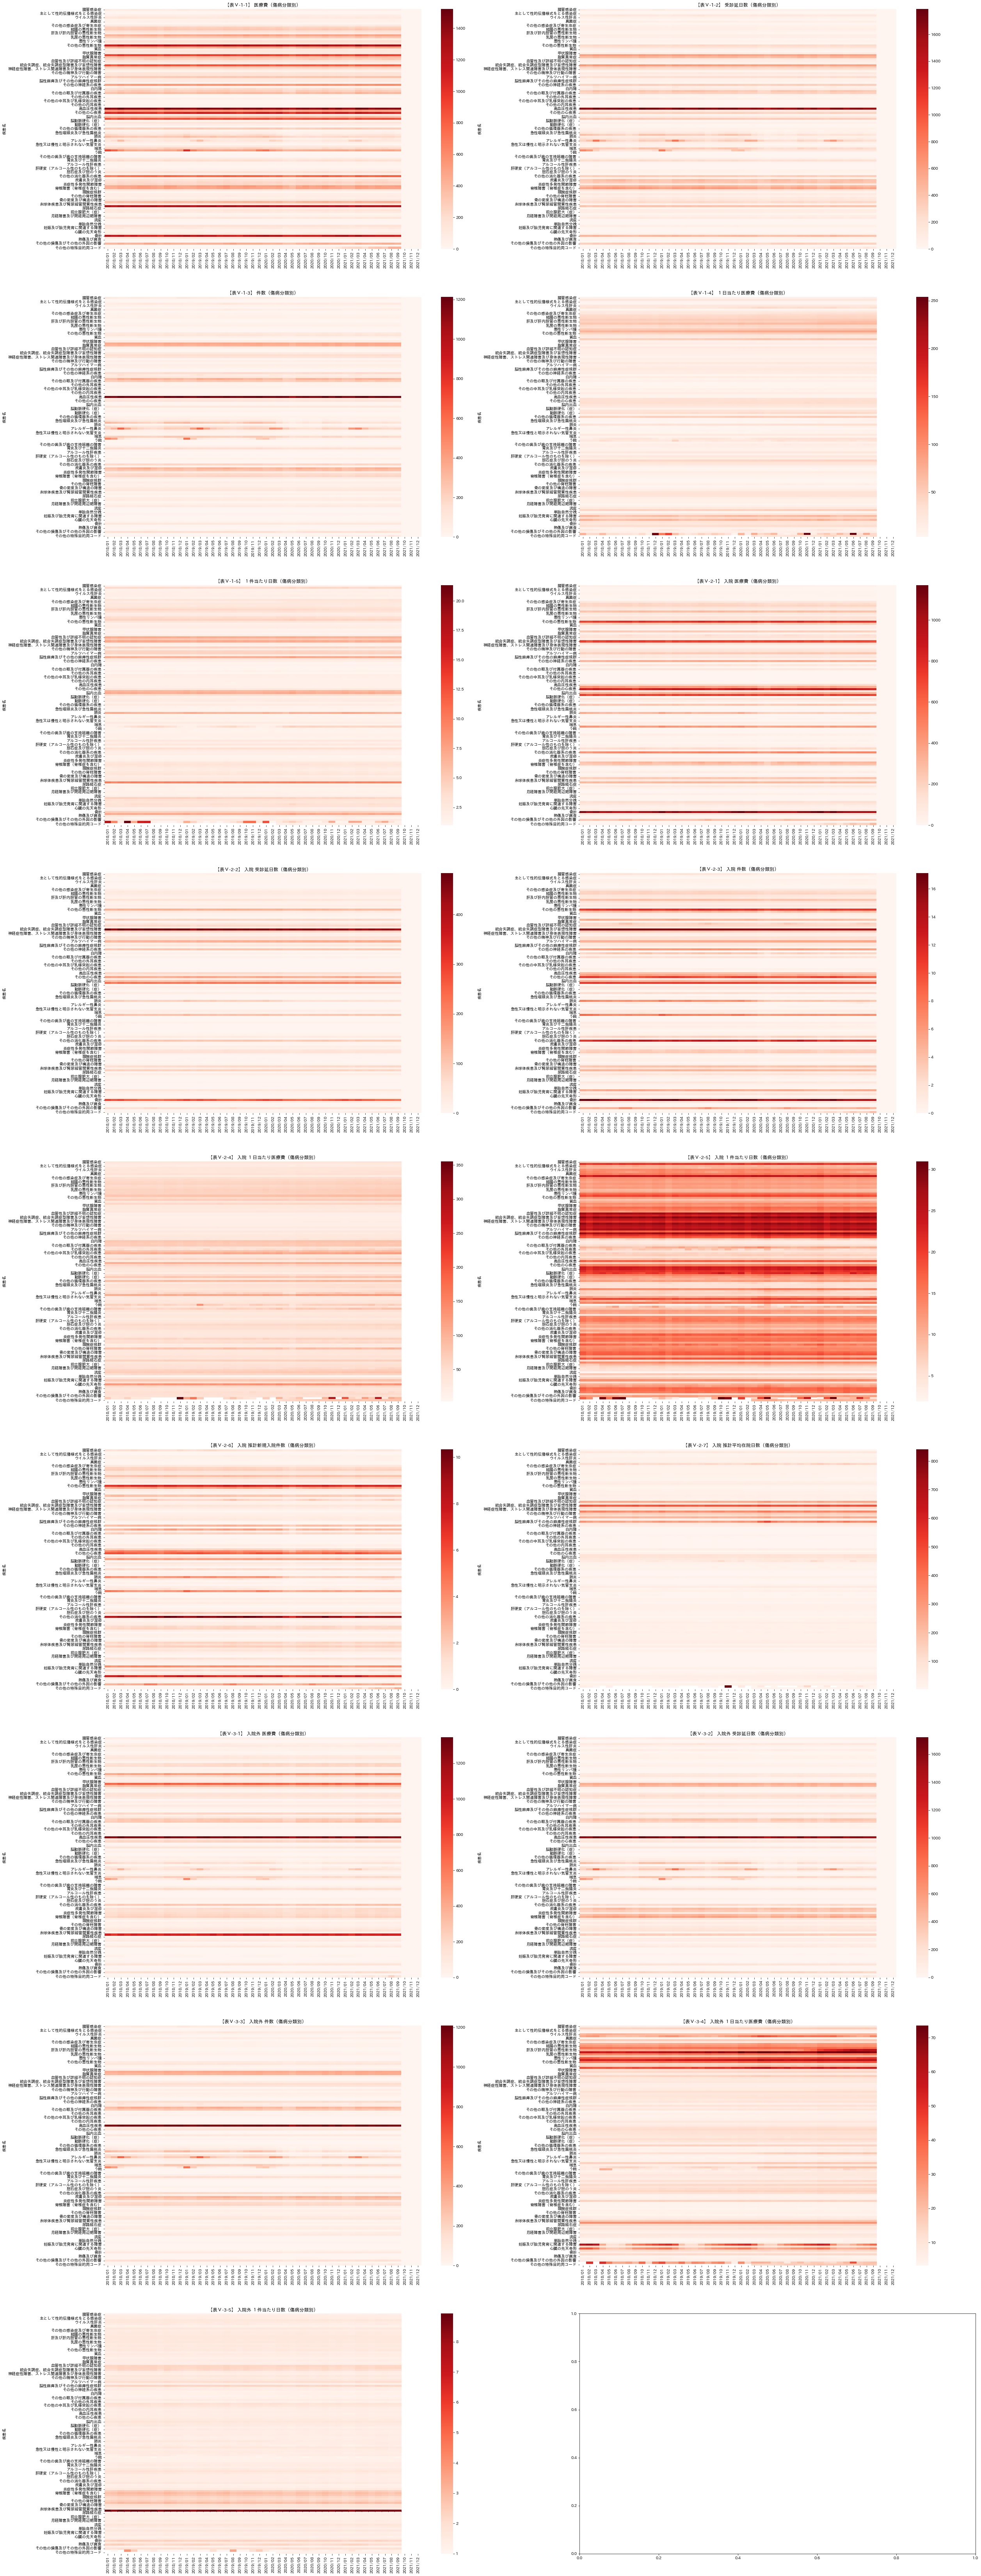

In [511]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(40, 120))
for i, (c, d) in enumerate(pdf1.items()):
    ax = axes[i // 2, i % 2]
    sns.heatmap(d.loc['2017/4':'2021/9', :].T, ax = ax, cmap='Reds')
    ax.set_title(c)

## サマリ

In [26]:
sumpdf1 = preprocessing_injured(df1, summary=True)

In [513]:
sumpdf1.keys()

dict_keys(['【表Ⅴ-1-1】 医療費（傷病分類別）', '【表Ⅴ-1-2】 受診延日数（傷病分類別）', '【表Ⅴ-1-3】 件数（傷病分類別）', '【表Ⅴ-1-4】 １日当たり医療費（傷病分類別）', '【表Ⅴ-1-5】 １件当たり日数（傷病分類別）', '【表Ⅴ-2-1】 入院 医療費（傷病分類別）', '【表Ⅴ-2-2】 入院 受診延日数（傷病分類別）', '【表Ⅴ-2-3】 入院 件数（傷病分類別）', '【表Ⅴ-2-4】 入院 １日当たり医療費（傷病分類別）', '【表Ⅴ-2-5】 入院 １件当たり日数（傷病分類別）', '【表Ⅴ-2-6】 入院 推計新規入院件数（傷病分類別）', '【表Ⅴ-2-7】 入院 推計平均在院日数（傷病分類別）', '【表Ⅴ-3-1】 入院外 医療費（傷病分類別）', '【表Ⅴ-3-2】 入院外 受診延日数（傷病分類別）', '【表Ⅴ-3-3】 入院外 件数（傷病分類別）', '【表Ⅴ-3-4】 入院外 １日当たり医療費（傷病分類別）', '【表Ⅴ-3-5】 入院外 １件当たり日数（傷病分類別）'])

In [514]:
sumpdf1['【表Ⅴ-1-1】 医療費（傷病分類別）'].columns

Index(['感染症及び寄生虫症', '新生物', '血液及び造血器の疾患並びに免疫機構の障害', '内分泌、栄養及び代謝疾患', '精神及び行動の障害',
       '神経系の疾患', '眼及び付属器の疾患', '耳及び乳様突起の疾患', '循環器系の疾患', '呼吸器系の疾患', '消化器系の疾患',
       '皮膚及び皮下組織の疾患', '筋骨格系及び結合組織の疾患', '腎尿路生殖器系の疾患', '妊娠、分娩及び産じょく',
       '周産期に発生した病態', '先天奇形、変形及び染色体異常', '症状、徴候及び異常臨床所見・異常検査所見で他に分類されないもの',
       '損傷、中毒及びその他の外因の影響', '特殊目的用コード', '不詳'],
      dtype='object', name='疾患名')

In [515]:
pdf1['【表Ⅴ-1-1】 医療費（傷病分類別）'].columns

Index(['腸管感染症', '結核', '主として性的伝播様式をとる感染症', '皮膚及び粘膜の病変を伴うウイルス性疾患', 'ウイルス性肝炎',
       'その他のウイルス性疾患', '真菌症', '感染症及び寄生虫症の続発・後遺症', 'その他の感染症及び寄生虫症', '胃の悪性新生物',
       ...
       'その他の周産期に発生した病態', '心臓の先天奇形', 'その他の先天奇形、変形及び染色体異常', '骨折', '頭蓋内損傷及び内臓の損傷',
       '熱傷及び腐食', '中毒', 'その他の損傷及びその他の外因の影響', '重症急性呼吸器症候群［ＳＡＲＳ］',
       'その他の特殊目的用コード'],
      dtype='object', name='疾患名', length=121)

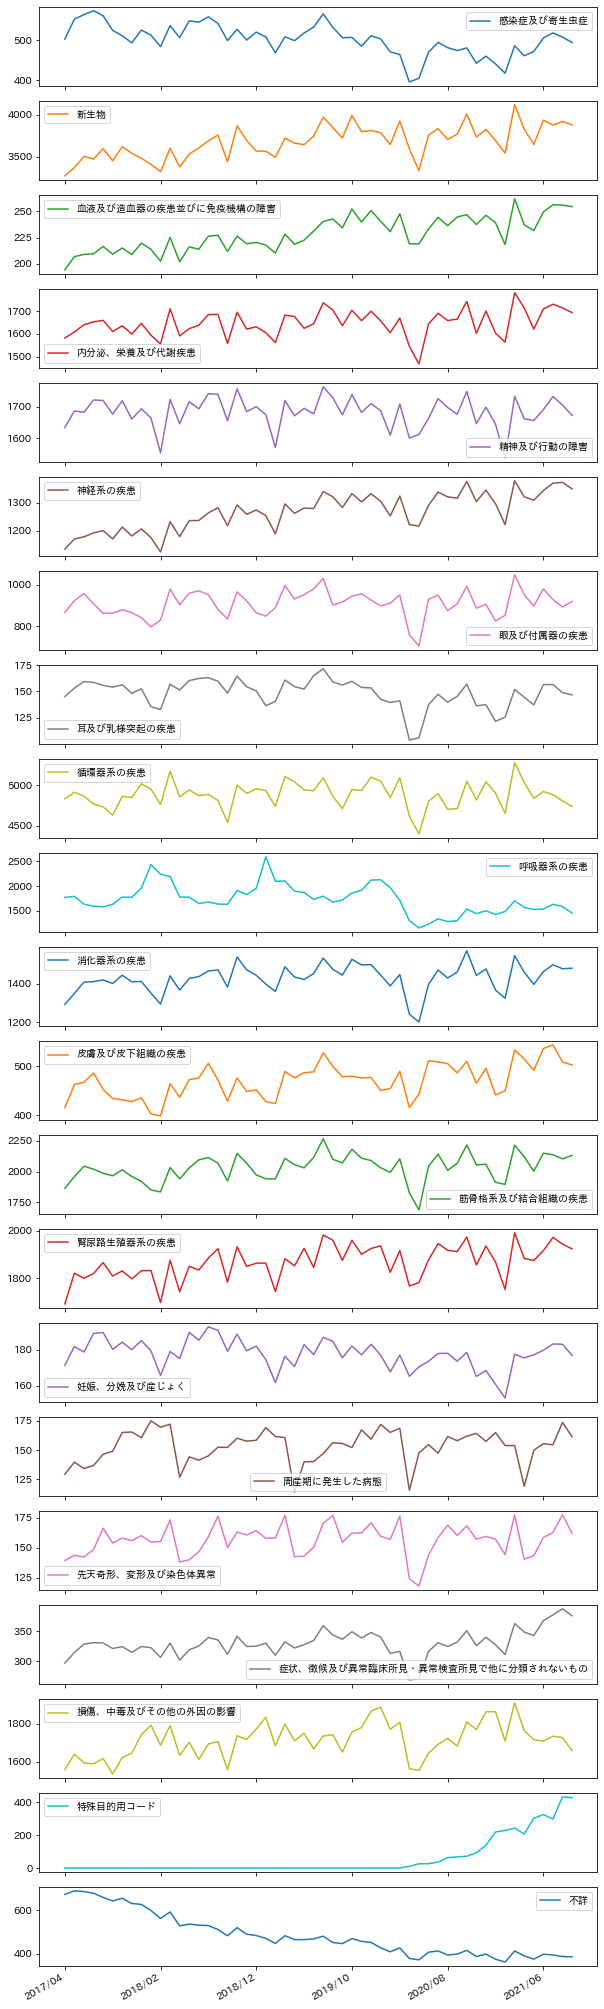

In [517]:
sumpdf1['【表Ⅴ-1-1】 医療費（傷病分類別）'].loc['2017/04':'2021/09', :].plot(subplots=True, figsize=(10, 40))
plt.show()

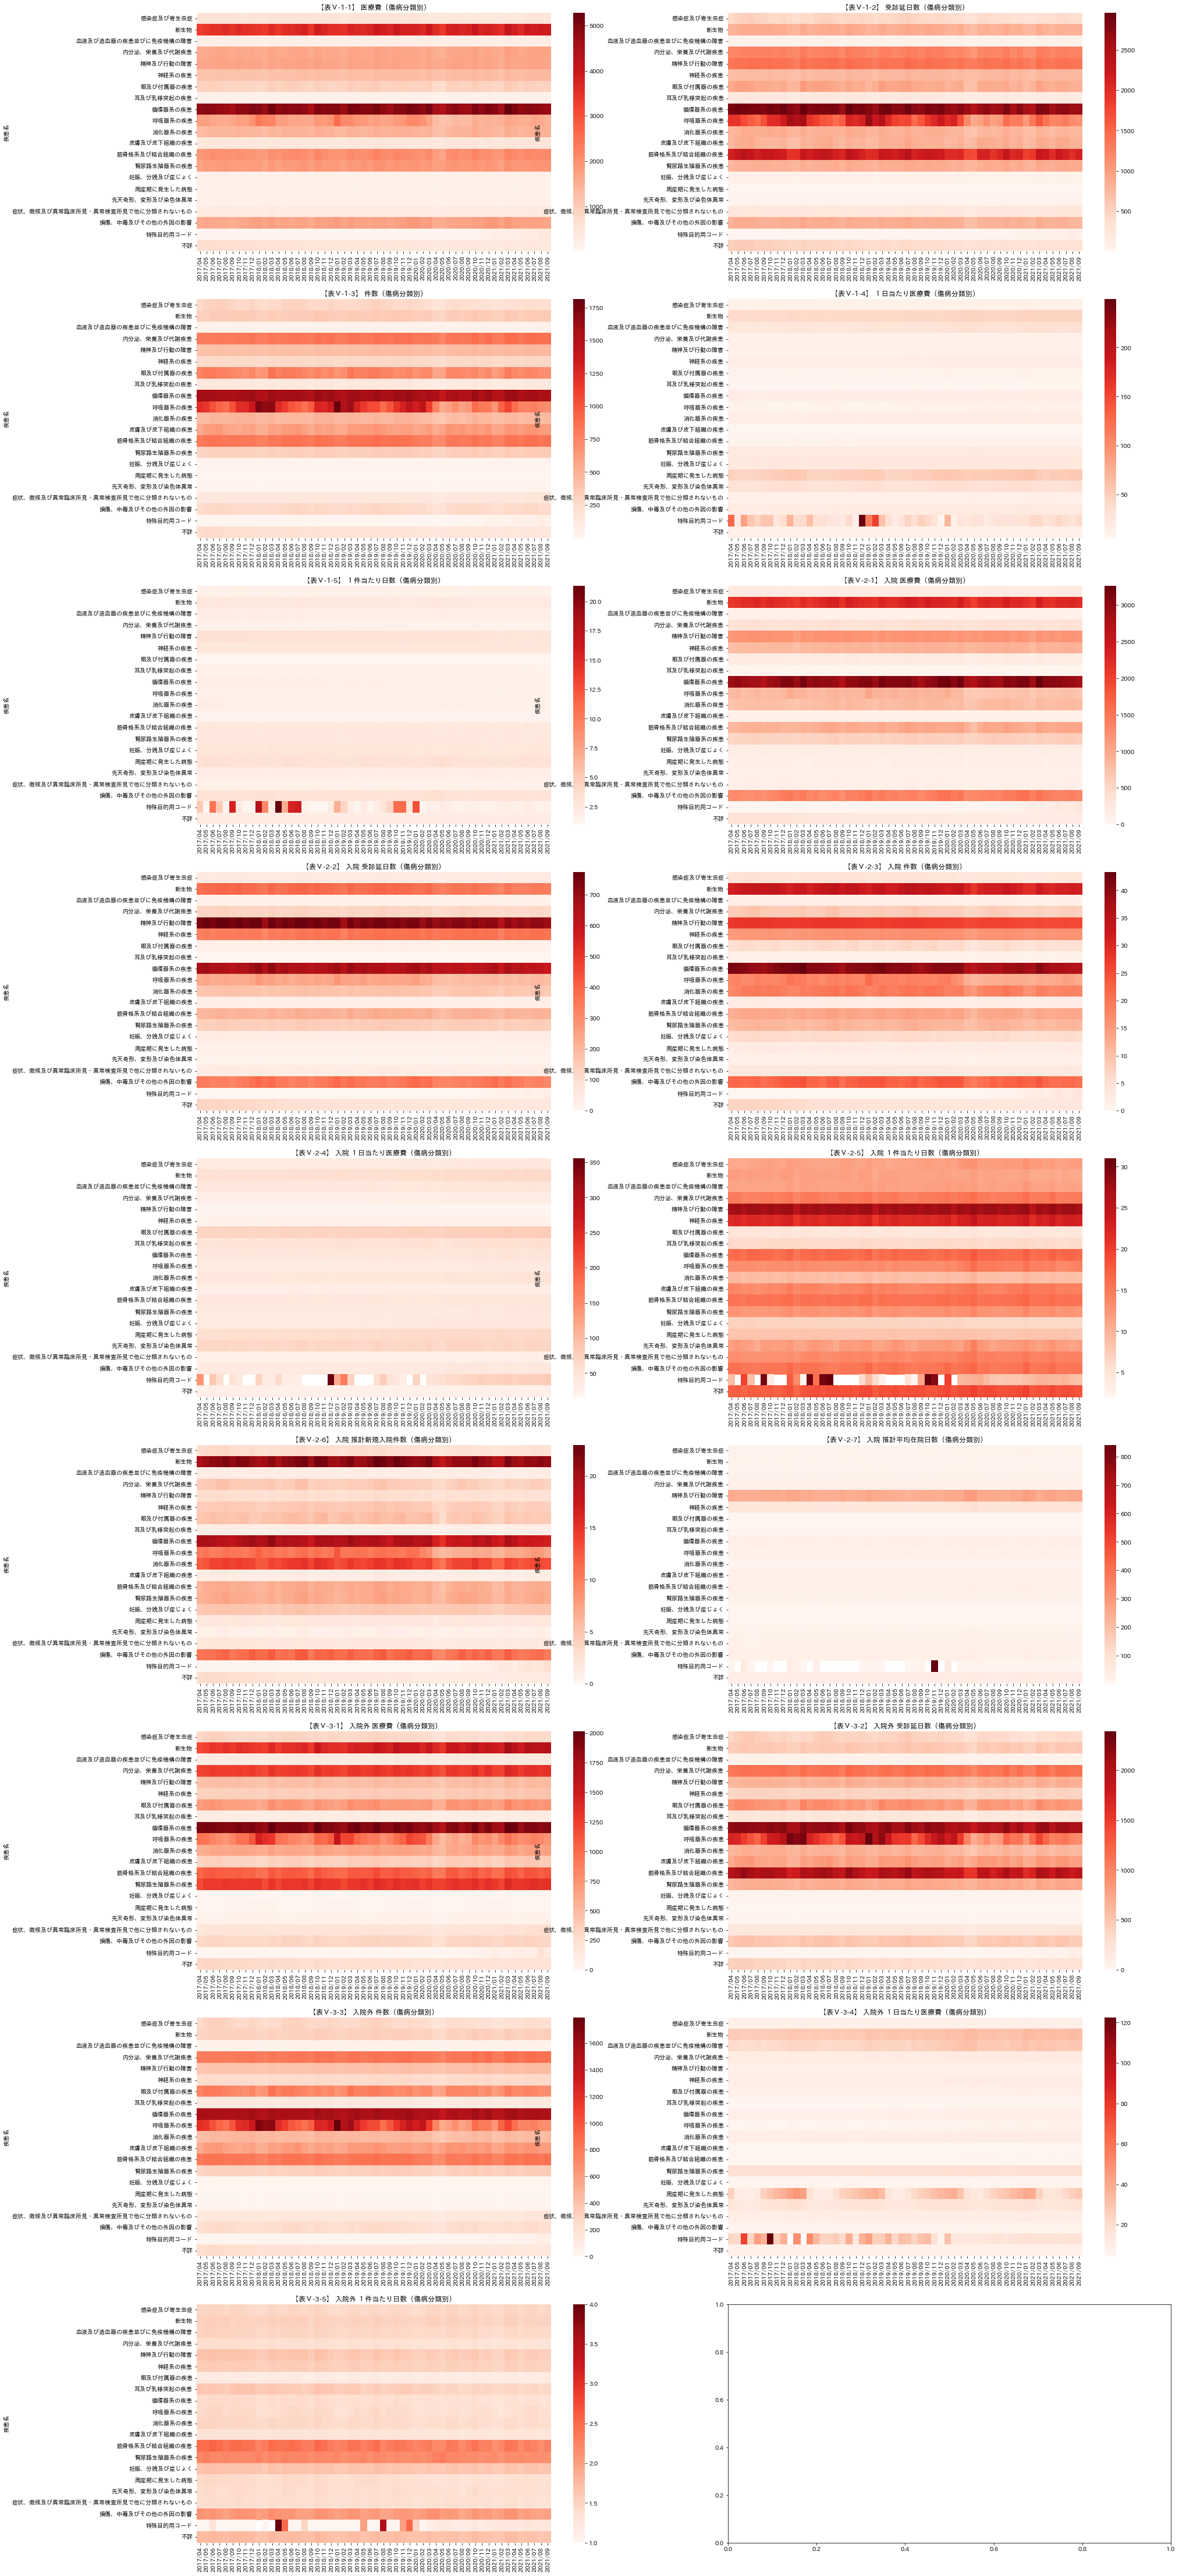

In [518]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(30, 80))
for i, (c, d) in enumerate(sumpdf1.items()):
    ax = axes[i // 2, i % 2]
    sns.heatmap(d.loc['2017/04':'2021/09', :].astype(float).T, ax = ax, cmap='Reds')
    ax.set_title(c)

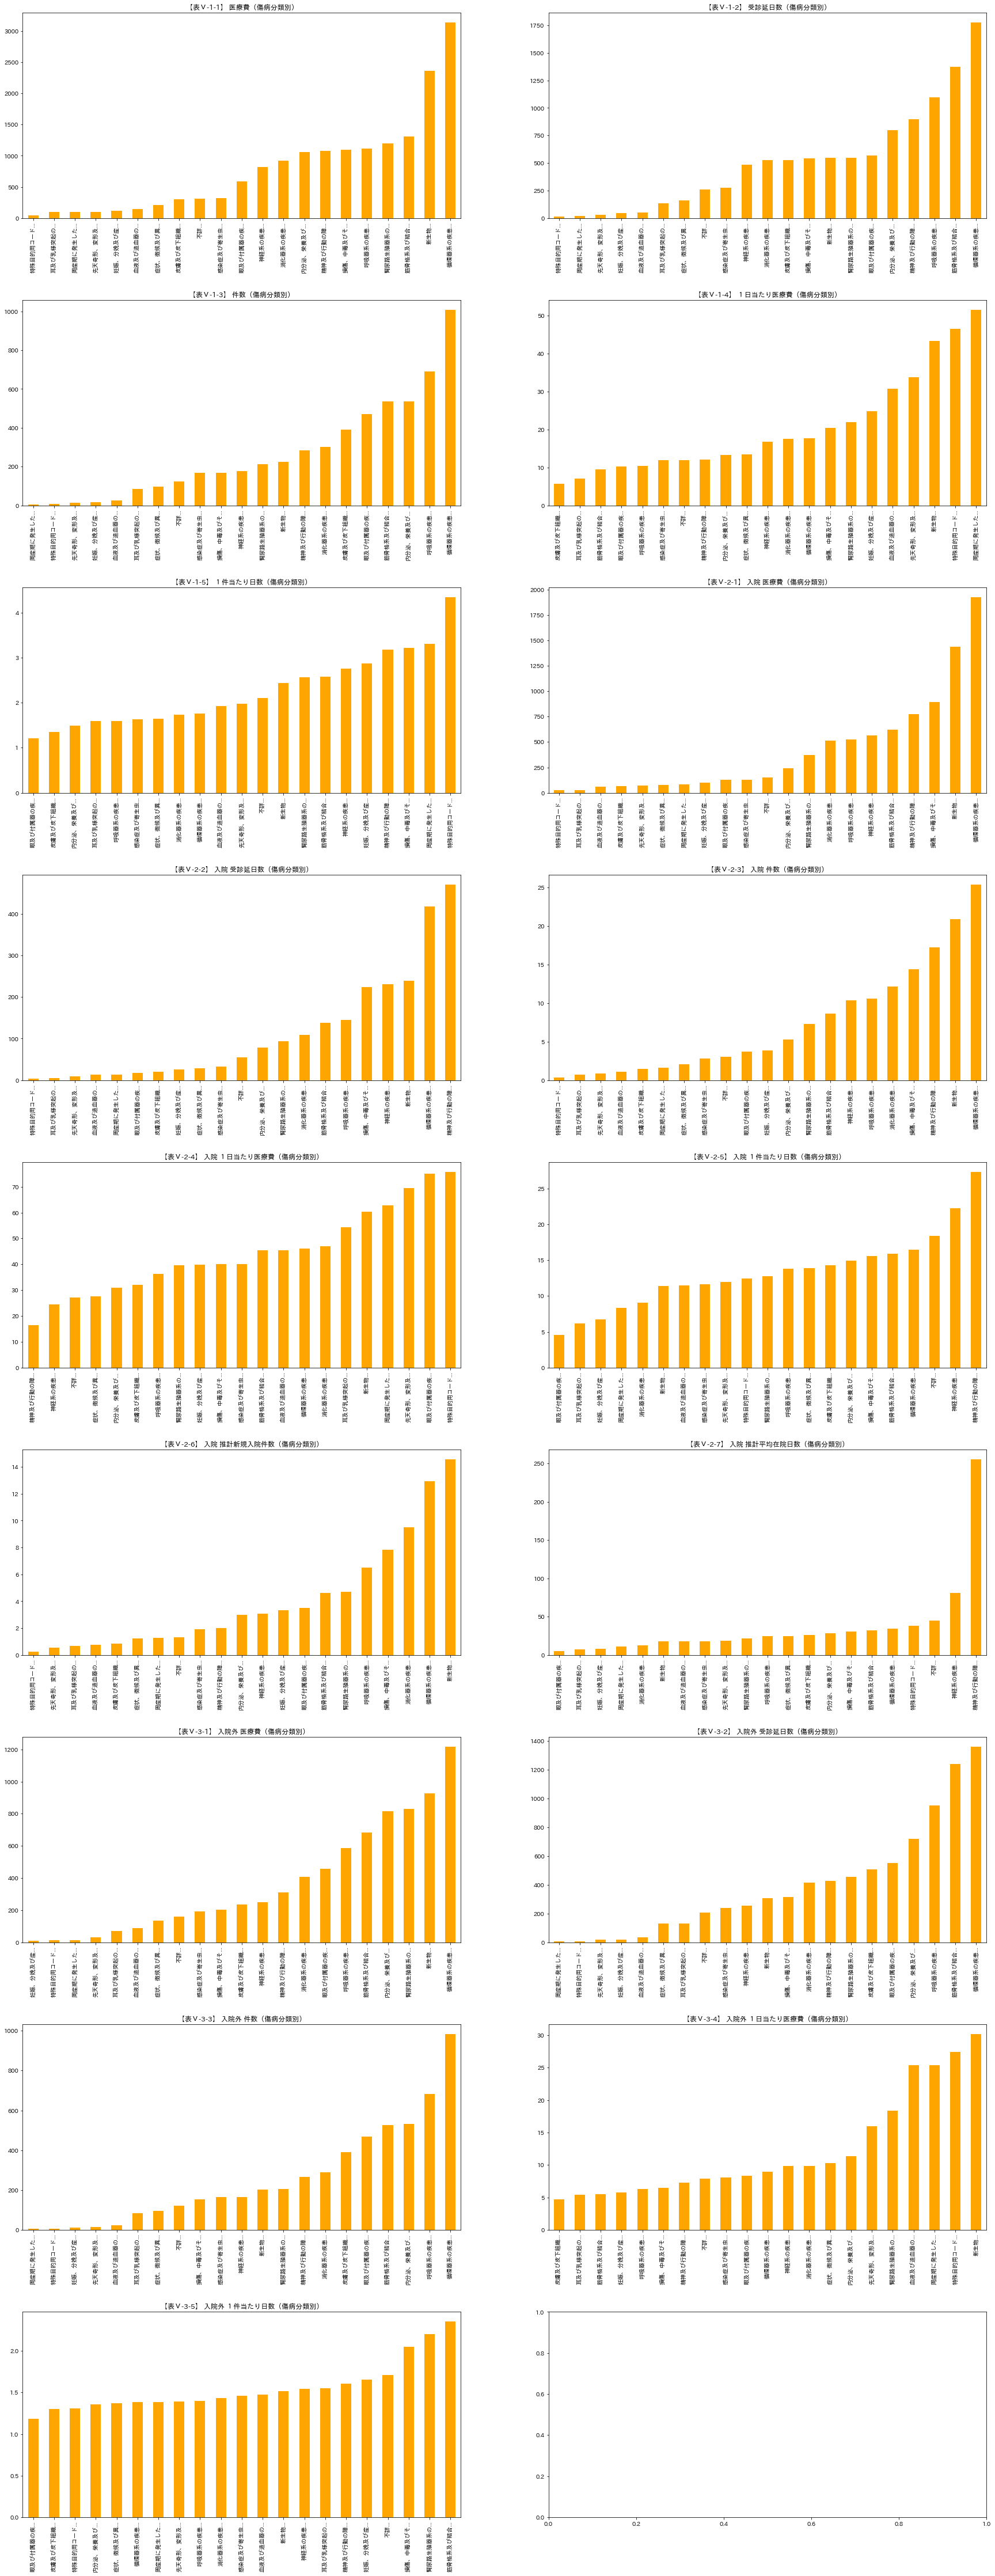

In [519]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(30, 80))
plt.subplots_adjust(hspace=0.4)
for i, (c, d) in enumerate(sumpdf1.items()):
    dc = d.copy()
    ax = axes[i // 2, i % 2]
    dc.columns = [f'{c[:8]}...' for c in dc.columns]
    dc.mean(axis=0).sort_values().plot.bar(ax=ax, color='orange')
    ax.set_title(c)

In [48]:
import colorcet as cc

palette = sns.color_palette(cc.glasbey, n_colors=21)

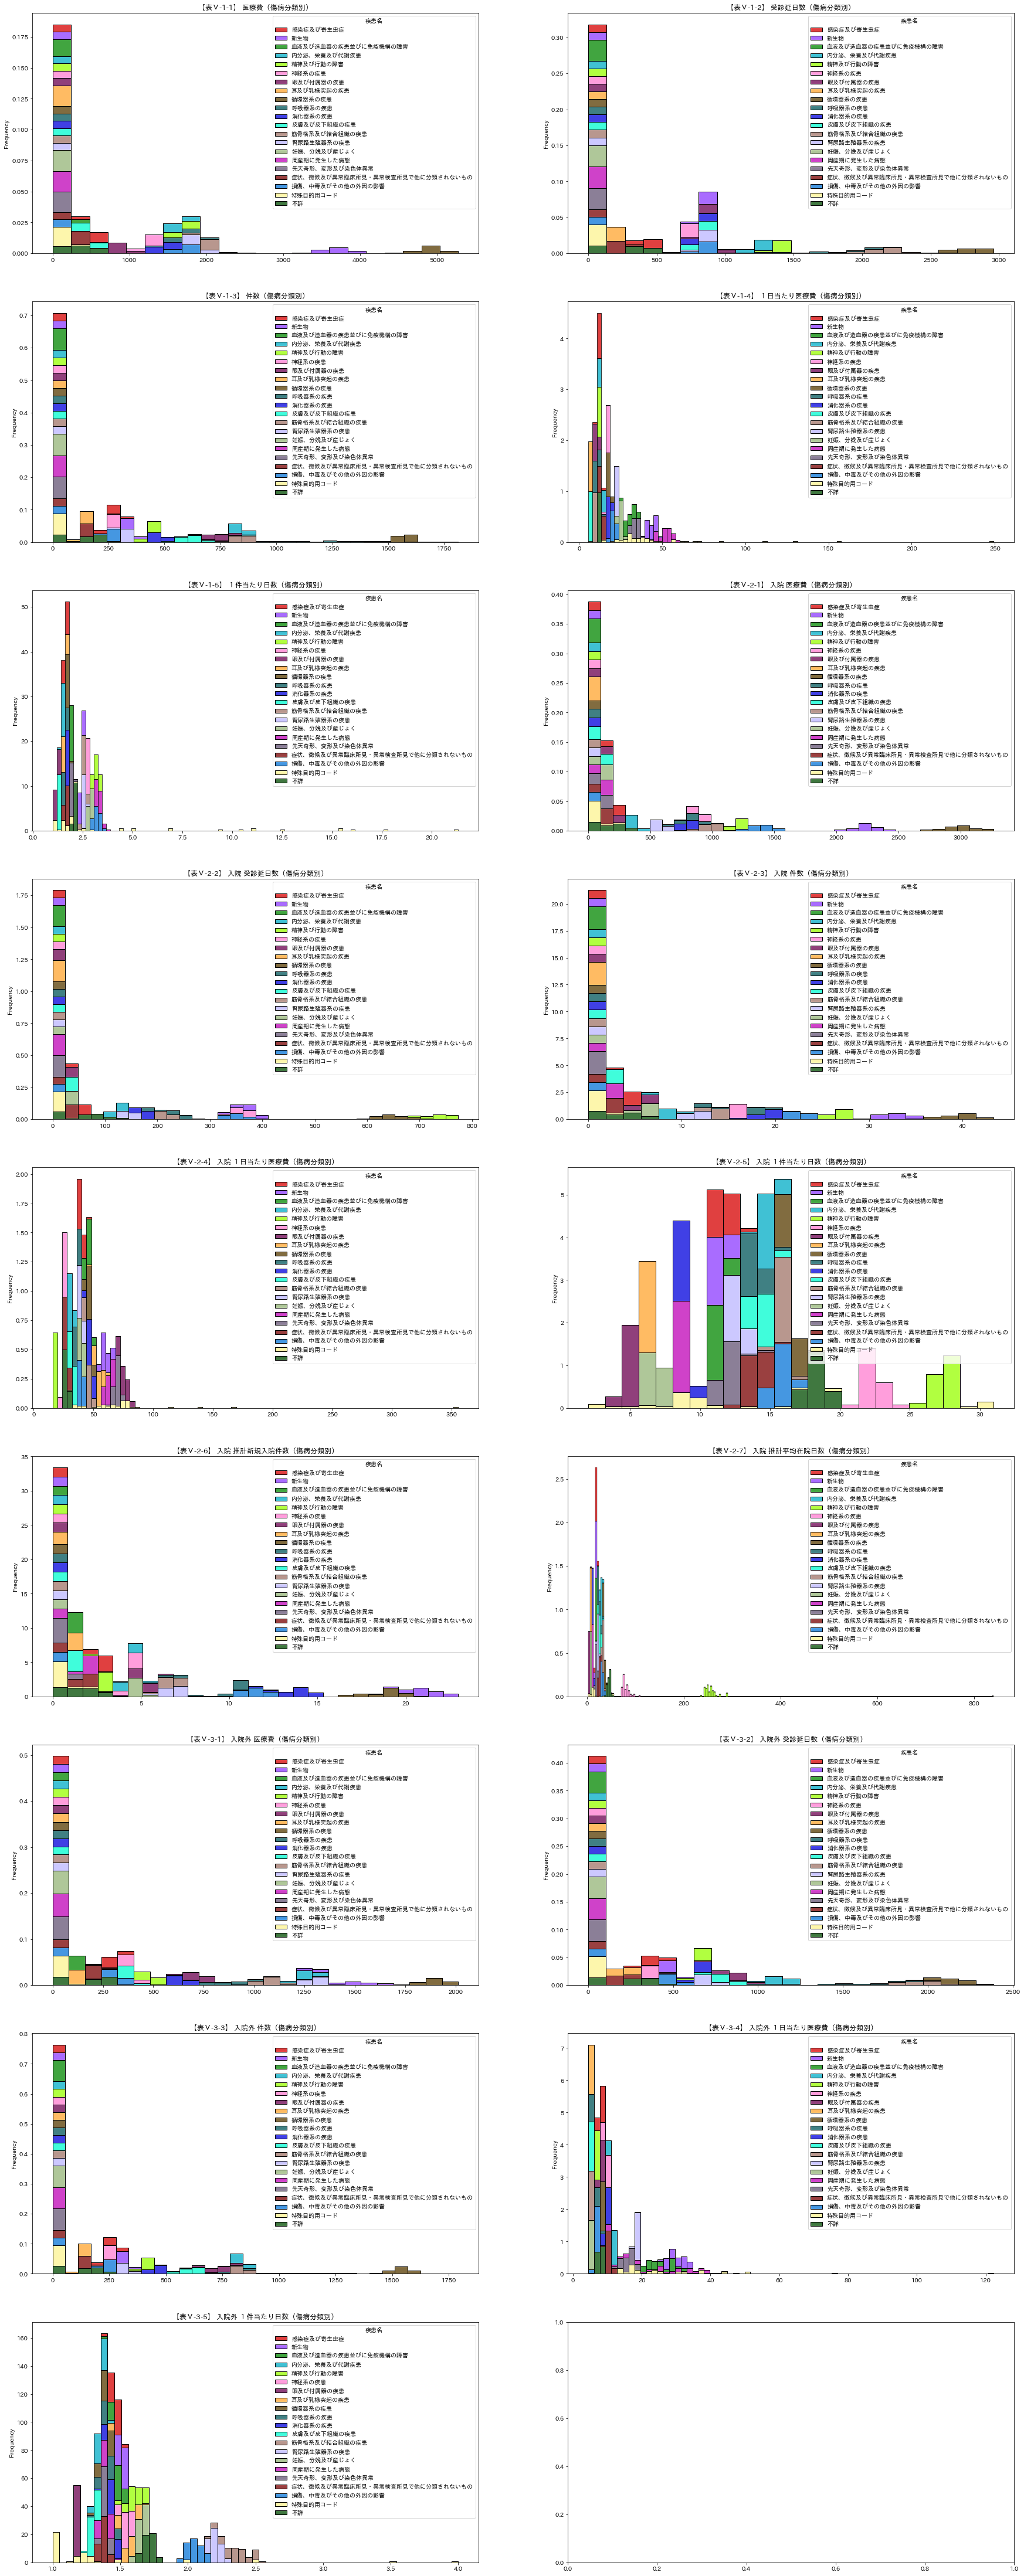

In [49]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(30, 80))
for i, (c, d) in enumerate(sumpdf1.items()):
    ax = axes[i // 2, i % 2]
    sns.histplot(d, multiple="stack", stat='frequency', ax=ax, palette=palette)
    ax.set_title(c)
plt.show()

In [50]:
import joypy

* 平均と分散が変化しているものを選ぶ

In [52]:
def mean_std_diff_index(df):
    mean_std = df.groupby('年').agg(['mean', 'std'])
    mean_std_diff = abs(mean_std.iloc[:-1].to_numpy() - mean_std.iloc[1:].to_numpy())
    mean_std_diff = pd.DataFrame(mean_std_diff, index=mean_std.index[:-1], columns=mean_std.columns)
    
    # 平均の変化が最も大きなカラムを取り出す
    sorted_mean = mean_std_diff.loc[:, (slice(None), 'mean')].sum(axis=0).sort_values()
    # sorted_mean.plot.bar()
    top_3_mean_columns = [t[0] for t in sorted_mean.index[-3::]]
    
    # 標準偏差の変化が最も大きなカラムを取り出す
    sorted_std = mean_std_diff.loc[:, (slice(None), 'std')].sum(axis=0).sort_values()
    # sorted_std.plot.bar()
    top_3_std_columns = [t[0] for t in sorted_std.index[-3::]]
    
    return list(set(top_3_mean_columns + top_3_std_columns))

<Figure size 720x720 with 0 Axes>

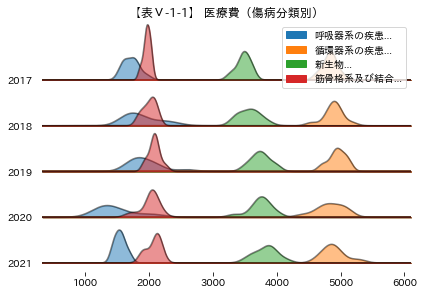

<Figure size 720x720 with 0 Axes>

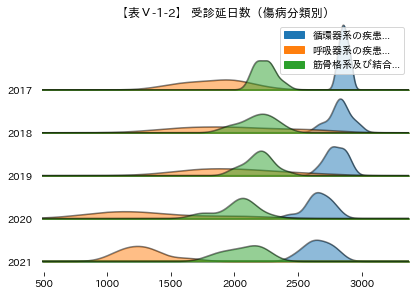

<Figure size 720x720 with 0 Axes>

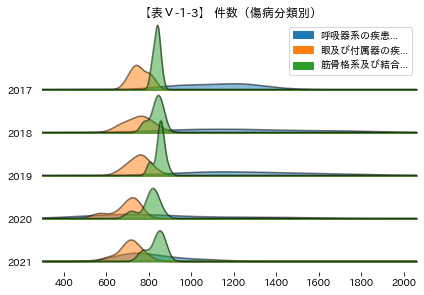

<Figure size 720x720 with 0 Axes>

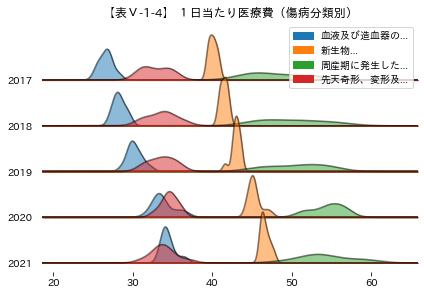

<Figure size 720x720 with 0 Axes>

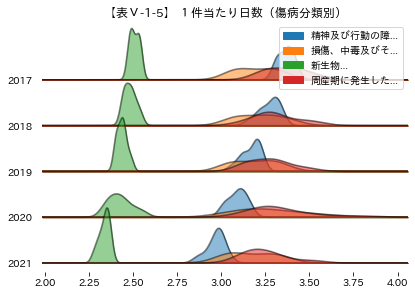

<Figure size 720x720 with 0 Axes>

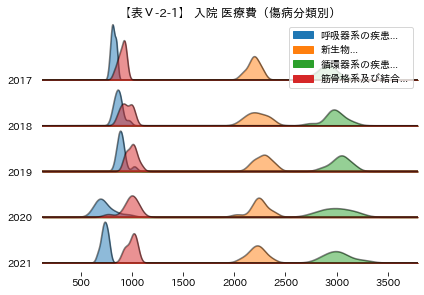

<Figure size 720x720 with 0 Axes>

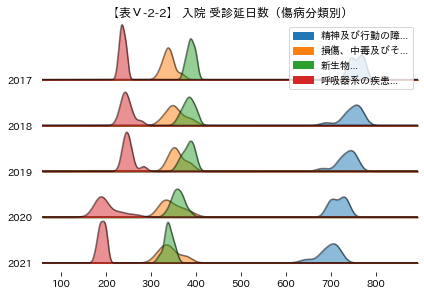

<Figure size 720x720 with 0 Axes>

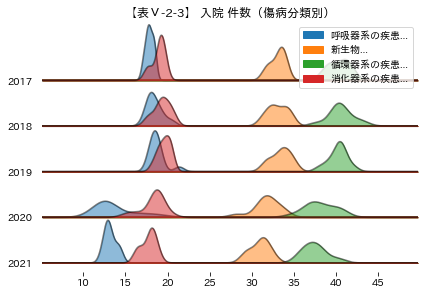

<Figure size 720x720 with 0 Axes>

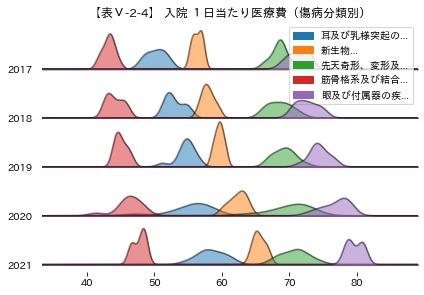

<Figure size 720x720 with 0 Axes>

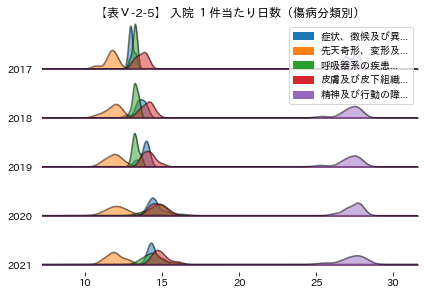

<Figure size 720x720 with 0 Axes>

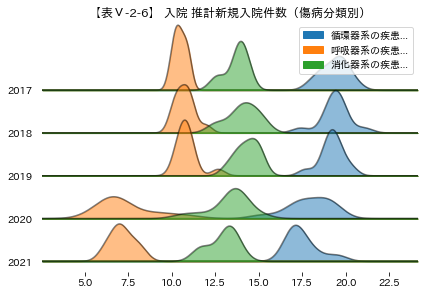

<Figure size 720x720 with 0 Axes>

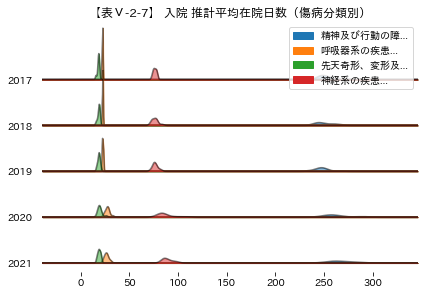

<Figure size 720x720 with 0 Axes>

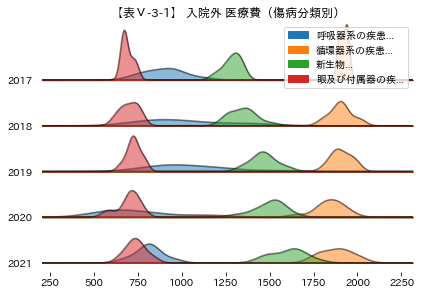

<Figure size 720x720 with 0 Axes>

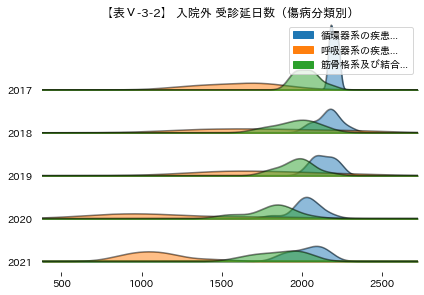

<Figure size 720x720 with 0 Axes>

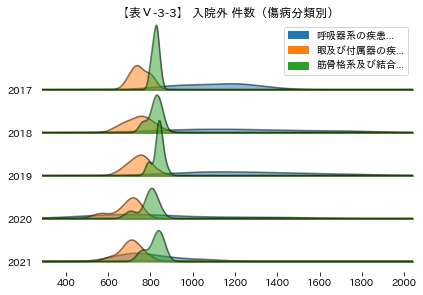

<Figure size 720x720 with 0 Axes>

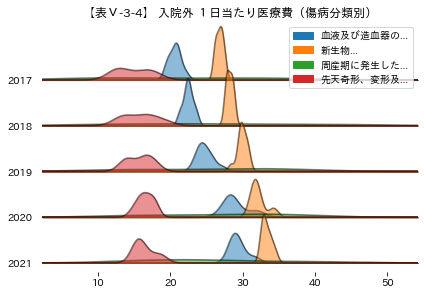

<Figure size 720x720 with 0 Axes>

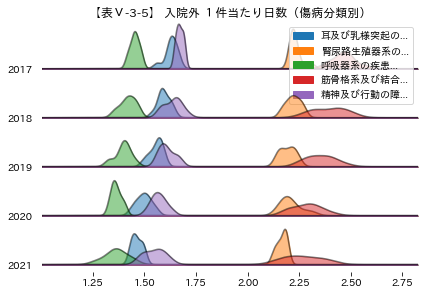

In [53]:
for i, (c, d) in enumerate(sumpdf1.items()):
    plt.figure(figsize=(10, 10))
    sd = d.loc['2017/04':'2021/09', :].copy()
    sd.loc[:, '年'] = pd.to_datetime(sd.index).year.astype(int)
    sd.drop(['特殊目的用コード', '不詳'], axis=1, inplace=True)
    sd.columns = [f'{c[:8]}...' if c != '年' else c for c in sd.columns]
    show_columns = mean_std_diff_index(sd)
    joypy.joyplot(sd.loc[:, show_columns + ['年']], column=show_columns, by='年', legend=True, alpha=0.5)
    plt.title(c)
    plt.show()

# 年齢別

In [57]:
df2 = pd.read_excel('./data/202109-1.xlsx', engine='openpyxl', sheet_name=list(range(51, 68)))

In [539]:
df2[51].head(10)

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3           Unnamed: 4  \
0         NaN         NaN         NaN         NaN                  NaN   
1         NaN         NaN         NaN         NaN  【表Ⅳ-1-1】 医療費（年齢階級別）   
2         NaN         NaN         NaN         NaN                  NaN   
3         NaN         NaN         NaN         NaN                  NaN   
4         NaN         NaN         NaN         NaN                  NaN   
5         NaN         NaN         NaN         NaN                  NaN   
6         NaN         NaN         NaN         NaN                  NaN   
7         NaN         NaN         NaN         NaN                  NaN   
8         NaN         NaN         NaN         NaN                  NaN   
9         NaN         NaN         NaN         NaN                  NaN   

  Unnamed: 5 Unnamed: 6   Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0        NaN        NaN          NaN         NaN         NaN  ...   
1        NaN        NaN          NaN         NaN         NaN  ...   
2        NaN        NaN          NaN         NaN         NaN  ...   
3        NaN        NaN          NaN         NaN         NaN  ...   
4        NaN        NaN          NaN         NaN         NaN  ...   
5        NaN        NaN          NaN         NaN         NaN  ...   
6      電算処理分         総数          NaN         NaN         NaN  ...   
7        NaN        NaN    0歳以上 5歳未満         NaN         NaN  ...   
8        NaN        NaN   5歳以上 10歳未満         NaN         NaN  ...   
9        NaN        NaN  10歳以上 15歳未満         NaN         NaN  ...   

  Unnamed: 109 Unnamed: 110 Unnamed: 111 Unnamed: 112 Unnamed: 113  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   
5          10月          11月          12月           1月           2月   
6            0            0            0            0            0   
7            0            0            0            0            0   
8            0            0            0            0            0   
9            0            0            0            0            0   

  Unnamed: 114 Unnamed: 115 Unnamed: 116 Unnamed: 117           Unnamed: 118  
0          NaN          NaN          NaN          NaN                    NaN  
1          NaN          NaN          NaN          NaN                    NaN  
2          NaN          NaN      （単位：億円）          NaN                    NaN  
3          NaN          NaN          NaN          NaN  構成割合\n令和3年度\n4月～9月(%)  
4          NaN          NaN          NaN          NaN                    NaN  
5           3月          NaN          NaN          NaN                    NaN  
6            0          NaN          NaN          NaN                    100  
7            0          NaN          NaN          NaN                2.81081  
8            0          NaN          NaN          NaN                1.11122  
9            0          NaN          NaN          NaN                1.10447  

[10 rows x 119 columns]

In [56]:
def preprocessing_age(df):
    
    index_col = 'Unnamed: 7'
    index_num = 7
    
    prepocessed_data = dict()
    index = df[51].iloc[7:28, index_num].dropna()
    # print(index)
    columns = [f'{i}月' for i in range(4, 13)] + [f'{i}月' for i in range(1, 4)]
    nengo = list(range(2015, 2022))
    
    # データの順番に沿ったカラム
    all_columns = []
    for c in columns:
        if int(c[:-1]) > 3:
            all_columns += [pd.to_datetime(f'{n}/{c[:-1]}').strftime('%Y/%m') for n in nengo]
        else:
             all_columns += [pd.to_datetime(f'{n+1}/{c[:-1]}').strftime('%Y/%m') for n in nengo]
    
    # 並び替えた後のカラム
    sorted_columns = sorted(all_columns)
    # print(all_columns)
    
    for k, d in df.items():
        
        # df title
        title = d.iloc[1, 4]
        tdf = d.set_index(index_col)
        tdf.columns = tdf.iloc[5]
        # print(tdf.columns, tdf.index)
        tdf = tdf.iloc[:28, ].loc[index, columns]
        tdf = tdf.replace('・', np.nan).astype(float)
        
        # set columns nengo
        tdf.columns = all_columns
        tdf.index.name = '年齢'
        # 文字の間の空白を削除
        prepocessed_data[title] = tdf[sorted_columns].T

    return prepocessed_data

In [58]:
pdf2 = preprocessing_age(df2)

In [59]:
pdf2.keys()

dict_keys(['【表Ⅳ-1-1】 医療費（年齢階級別）', '【表Ⅳ-1-2】 受診延日数（年齢階級別）', '【表Ⅳ-1-3】 件数（年齢階級別）', '【表Ⅳ-1-4】 １日当たり医療費（年齢階級別）', '【表Ⅳ-1-5】 １件当たり日数（年齢階級別）', '【表Ⅳ-2-1】 入院 医療費（年齢階級別）', '【表Ⅳ-2-2】 入院 受診延日数（年齢階級別）', '【表Ⅳ-2-3】 入院 件数（年齢階級別）', '【表Ⅳ-2-4】 入院 １日当たり医療費（年齢階級別）', '【表Ⅳ-2-5】 入院 １件当たり日数（年齢階級別）', '【表Ⅳ-2-6】 入院 推計新規入院件数（年齢階級別）', '【表Ⅳ-2-7】 入院 推計平均在院日数（年齢階級別）', '【表Ⅳ-3-1】 入院外 医療費（年齢階級別）', '【表Ⅳ-3-2】 入院外 受診延日数（年齢階級別）', '【表Ⅳ-3-3】 入院外 件数（年齢階級別）', '【表Ⅳ-3-4】 入院外 １日当たり医療費（年齢階級別）', '【表Ⅳ-3-5】 入院外 １件当たり日数（年齢階級別）'])

In [549]:
pdf2['【表Ⅳ-1-1】 医療費（年齢階級別）']

年齢       0歳以上 5歳未満  5歳以上 10歳未満  10歳以上 15歳未満  15歳以上 20歳未満  20歳以上 25歳未満  \
2015/04        0.0         0.0          0.0          0.0          0.0   
2015/05        0.0         0.0          0.0          0.0          0.0   
2015/06        0.0         0.0          0.0          0.0          0.0   
2015/07        0.0         0.0          0.0          0.0          0.0   
2015/08        0.0         0.0          0.0          0.0          0.0   
...            ...         ...          ...          ...          ...   
2021/11        0.0         0.0          0.0          0.0          0.0   
2021/12        0.0         0.0          0.0          0.0          0.0   
2022/01        0.0         0.0          0.0          0.0          0.0   
2022/02        0.0         0.0          0.0          0.0          0.0   
2022/03        0.0         0.0          0.0          0.0          0.0   

年齢       25歳以上 30歳未満  30歳以上 35歳未満  35歳以上 40歳未満  40歳以上 45歳未満  45歳以上 50歳未満  ...  \
2015/04          0.0          0.0          0.0          0.0          0.0  ...   
2015/05          0.0          0.0          0.0          0.0          0.0  ...   
2015/06          0.0          0.0          0.0          0.0          0.0  ...   
2015/07          0.0          0.0          0.0          0.0          0.0  ...   
2015/08          0.0          0.0          0.0          0.0          0.0  ...   
...              ...          ...          ...          ...          ...  ...   
2021/11          0.0          0.0          0.0          0.0          0.0  ...   
2021/12          0.0          0.0          0.0          0.0          0.0  ...   
2022/01          0.0          0.0          0.0          0.0          0.0  ...   
2022/02          0.0          0.0          0.0          0.0          0.0  ...   
2022/03          0.0          0.0          0.0          0.0          0.0  ...   

年齢       55歳以上 60歳未満  60歳以上 65歳未満  65歳以上 70歳未満  70歳以上 75歳未満  75歳以上 80歳未満  \
2015/04          0.0          0.0          0.0          0.0          0.0   
2015/05          0.0          0.0          0.0          0.0          0.0   
2015/06          0.0          0.0          0.0          0.0          0.0   
2015/07          0.0          0.0          0.0          0.0          0.0   
2015/08          0.0          0.0          0.0          0.0          0.0   
...              ...          ...          ...          ...          ...   
2021/11          0.0          0.0          0.0          0.0          0.0   
2021/12          0.0          0.0          0.0          0.0          0.0   
2022/01          0.0          0.0          0.0          0.0          0.0   
2022/02          0.0          0.0          0.0          0.0          0.0   
2022/03          0.0          0.0          0.0          0.0          0.0   

年齢       80歳以上 85歳未満  85歳以上 90歳未満  90歳以上 95歳未満  95歳以上 100歳未満  100歳以上  
2015/04          0.0          0.0          0.0           0.0     0.0  
2015/05          0.0          0.0          0.0           0.0     0.0  
2015/06          0.0          0.0          0.0           0.0     0.0  
2015/07          0.0          0.0          0.0           0.0     0.0  
2015/08          0.0          0.0          0.0           0.0     0.0  
...              ...          ...          ...           ...     ...  
2021/11          0.0          0.0          0.0           0.0     0.0  
2021/12          0.0          0.0          0.0           0.0     0.0  
2022/01          0.0          0.0          0.0           0.0     0.0  
2022/02          0.0          0.0          0.0           0.0     0.0  
2022/03          0.0          0.0          0.0           0.0     0.0  

[84 rows x 21 columns]

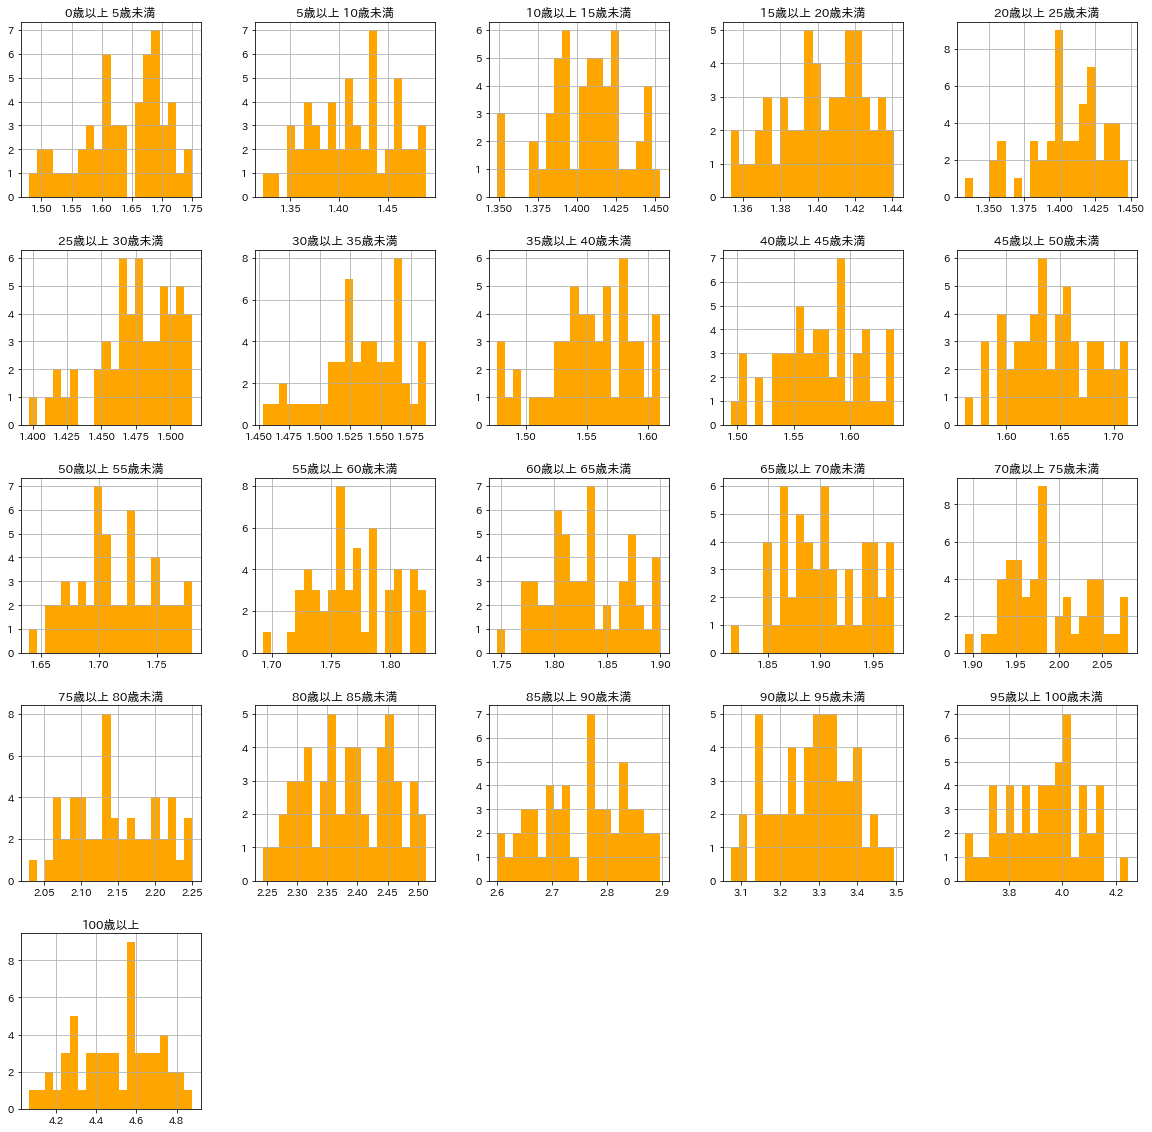

In [561]:
pdf2['【表Ⅳ-1-5】 １件当たり日数（年齢階級別）'].loc['2017/04':'2021/09'].hist(figsize=(20, 20), color='orange', bins=20)
plt.show()

In [60]:
import squarify

In [92]:
def squarify_plot(df, title):
    df_sum = df.loc['2017/04':'2021/09'].sum(axis=0)
    plt.figure(figsize=(10,10))
    norms = squarify.normalize_sizes(df_sum.to_list(), dx=21, dy=21)
    squarify.plot(sizes=norms, label=df_sum.index, alpha=1, pad=True, color=sns.color_palette("hls",21))
    plt.title(title)
    plt.show()

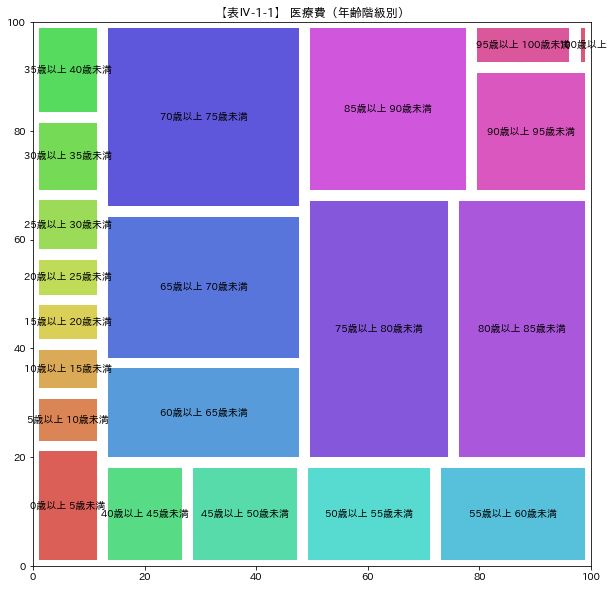

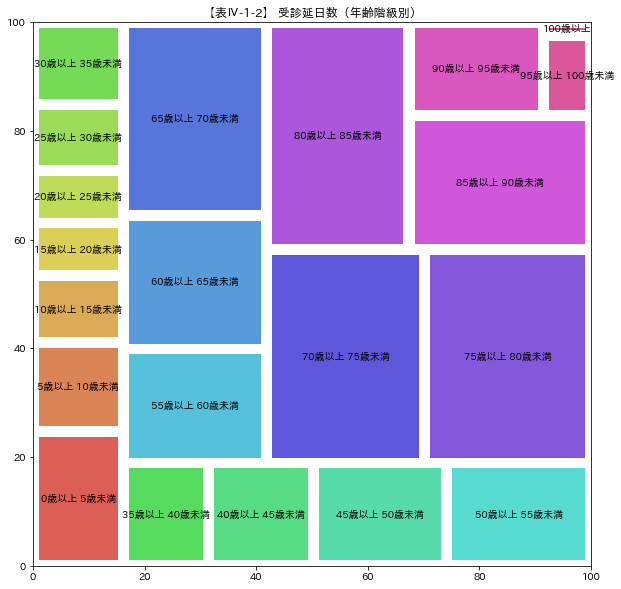

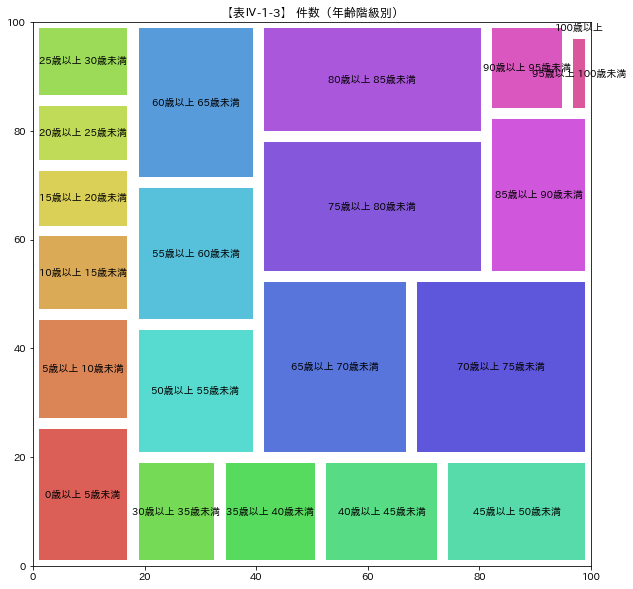

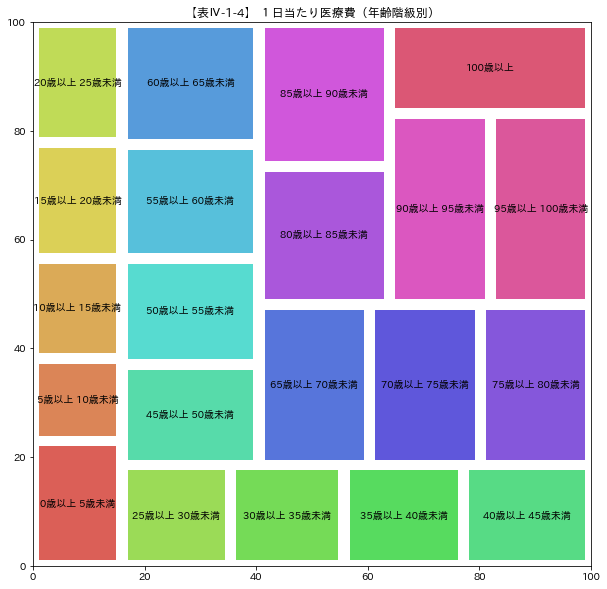

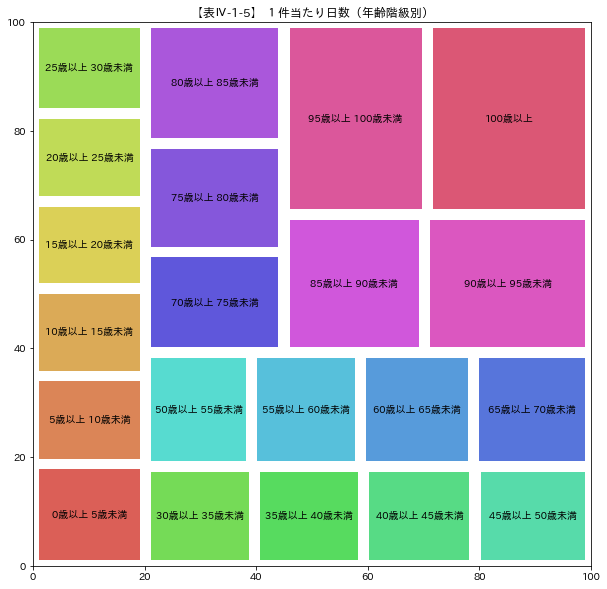

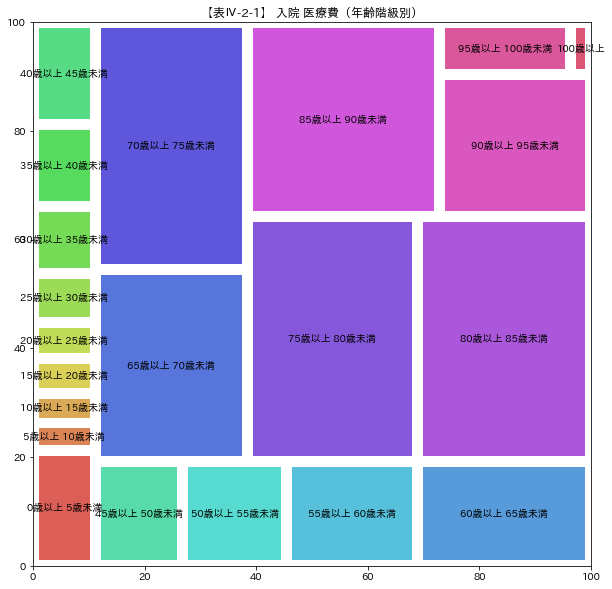

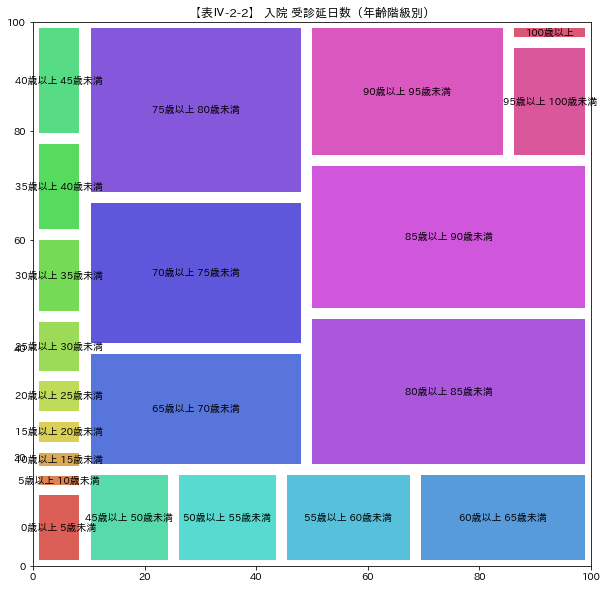

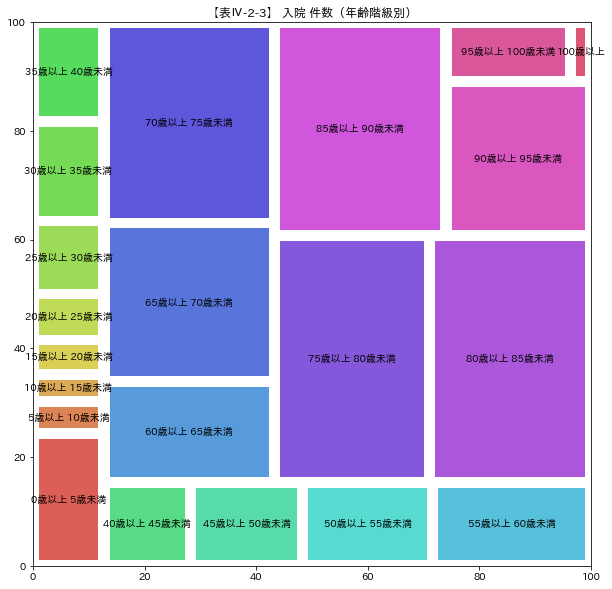

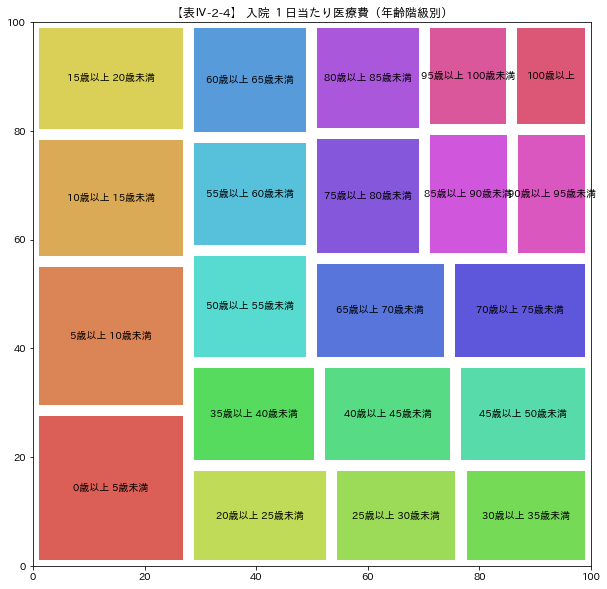

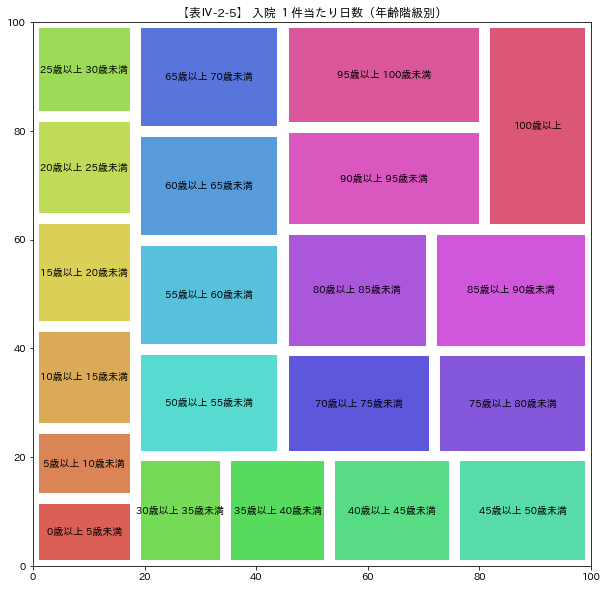

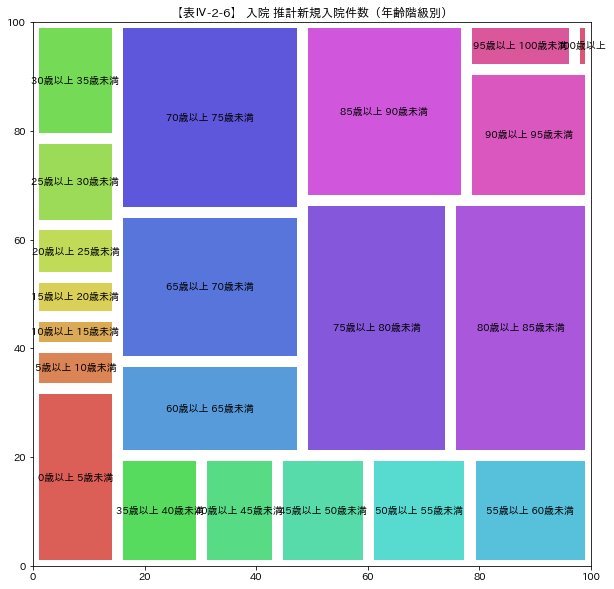

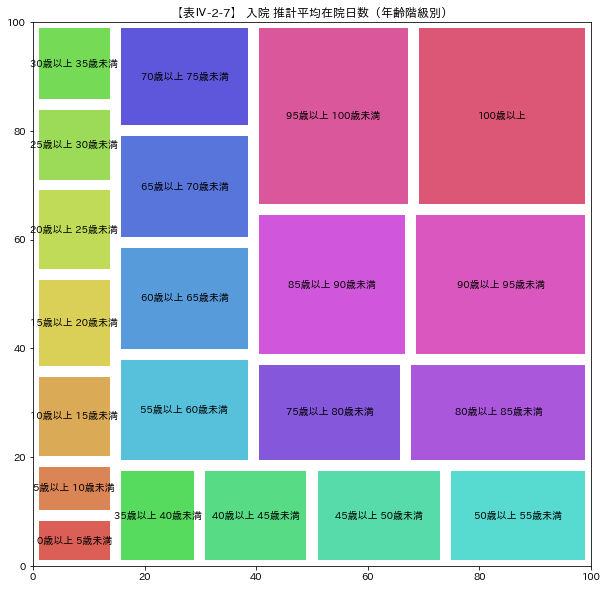

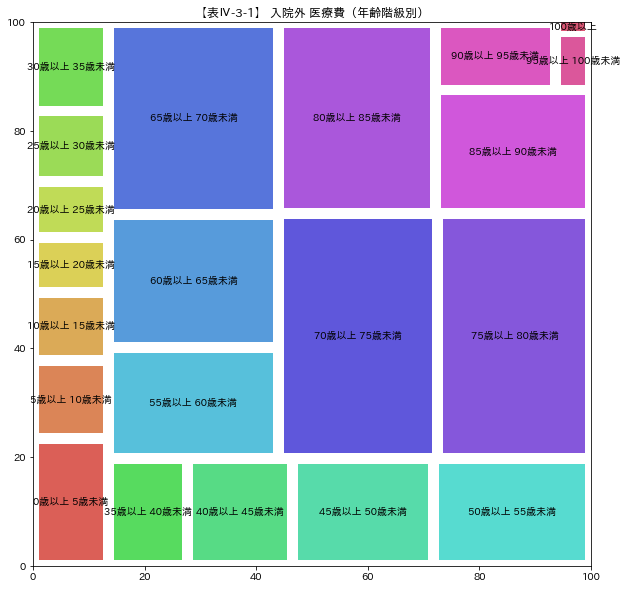

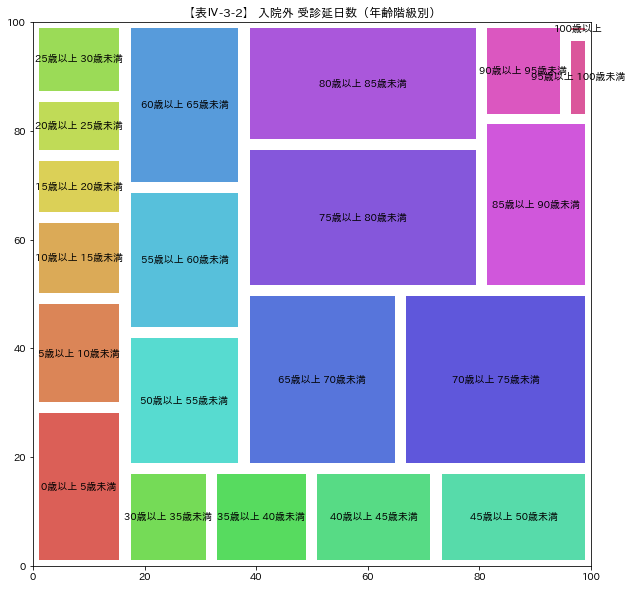

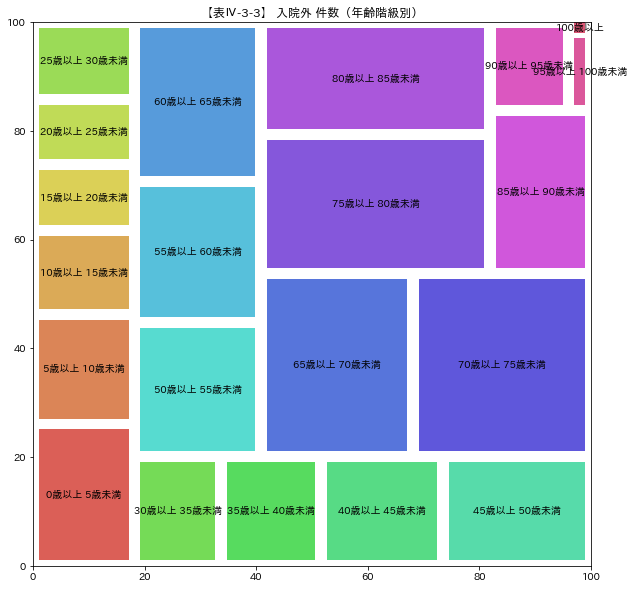

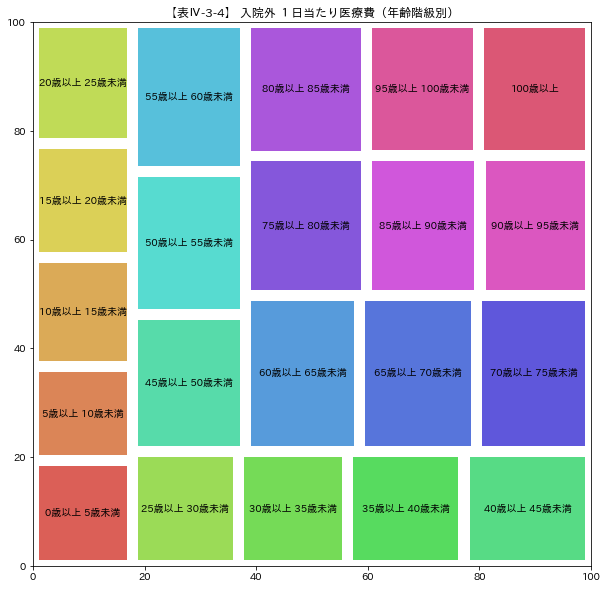

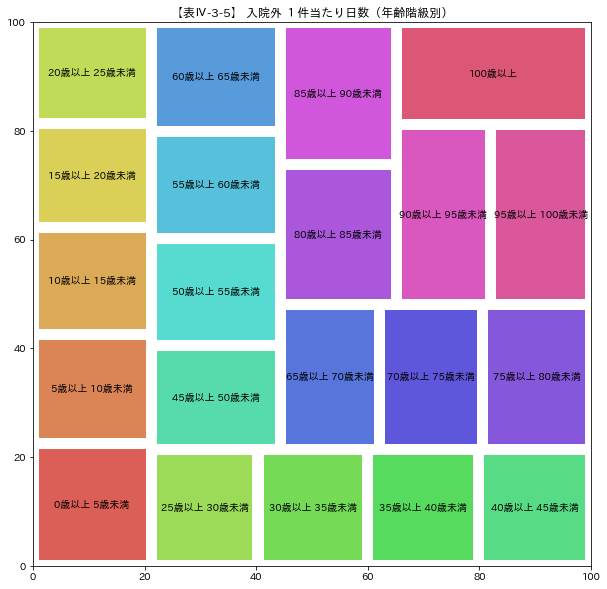

In [93]:
for k, v in pdf2.items():
    squarify_plot(v, k)